# 1. Introduction

This is a comprehensive Exploratory Data Analysis for the [Web Traffic Time Series Forecasting](https://www.kaggle.com/c/web-traffic-time-series-forecasting) competition.


## 1.1 Load libraries 

In [1]:
import pandas as pd
import numpy as np
from dfply import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
from plotnine import *
from datetime import datetime
from pyramid.arima import auto_arima
import math

## 1.2 Load data files
Note, that the *key_1.csv* data is not small with about 700 MB and for the purpose of this exploration we only read a few

In [2]:
train= pd.read_csv('Files/train_1.csv')
key= pd.read_csv('Files/key_1.csv',nrows=5)

## 1.3 File structure and content
Dimension of train and CSV

In [3]:
train

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
5                 5566_zh.wikipedia.org_all-access_spider        12.0   
6               91Days_zh.wikipedia.org_all-access_spider         NaN   
7                A'N'D_zh.wikipedia.org_all-access_spider       118.0   
8                AKB48_zh.wikipedia.org_all-access_spider         5.0   
9                ASCII_zh.wikipedia.org_all-access_spider         6.0   
10               ASTRO_zh.wikipedia.org_all-access_spider         NaN   
11      Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...         2.0   
12      All_your_base_are_belong_to_us_zh.wikipedia.or...         2.0   
13             AlphaGo_zh.wikipedia.org_all-access_spider         NaN   
14             Android_zh.wikipedia.org_all-access_spider         8.0   
15          Angelababy_zh.wikipedia.org_all-access_spider        40.0   
16               Apink_zh.wikipedia.org_all-access_spider        61.0   
17            Apple_II_zh.wikipedia.org_all-access_spider         4.0   
18              As_One_zh.wikipedia.org_all-access_spider        13.0   
19           B-PROJECT_zh.wikipedia.org_all-access_spider         NaN   
20                B1A4_zh.wikipedia.org_all-access_spider        22.0   
21                BDSM_zh.wikipedia.org_all-access_spider        25.0   
22               BEAST_zh.wikipedia.org_all-access_spider        19.0   
23             BIGBANG_zh.wikipedia.org_all-access_spider        23.0   
24          BLACK_PINK_zh.wikipedia.org_all-access_spider         NaN   
25              BLEACH_zh.wikipedia.org_all-access_spider        11.0   
26                BTOB_zh.wikipedia.org_all-access_spider        22.0   
27      Beautiful_Mind_zh.wikipedia.org_all-access_spider         NaN   
28              Beyond_zh.wikipedia.org_all-access_spider       291.0   
29                 Big_zh.wikipedia.org_all-access_spider         3.0   
...                                                   ...         ...   
145033  Sin_senos_sí_hay_paraíso_es.wikipedia.org_all-...         NaN   
145034  Anexo:Medallero_de_los_Juegos_Olímpicos_de_Río...         NaN   
145035  Arrival_(película)_es.wikipedia.org_all-access...         NaN   
145036  Anexo:Baloncesto_en_los_Juegos_Olímpicos_de_Rí...         NaN   
145037  Hasta_que_te_conocí_(serie_de_televisión)_es.w...         NaN   
145038  Westworld_(serie_de_televisión)_es.wikipedia.o...         NaN   
145039        Milénico_es.wikipedia.org_all-access_spider         NaN   
145040  Moonlight_(película)_es.wikipedia.org_all-acce...         NaN   
145041  Sully_(película)_es.wikipedia.org_all-access_s...         NaN   
145042  Pulsaciones_(serie_de_televisión)_es.wikipedia...         NaN   
145043  2091_(serie_de_televisión)_es.wikipedia.org_al...         NaN   
145044  Campeonato_Sudamericano_de_Fútbol_Sub-20_de_20...         NaN   
145045  Split_(película)_es.wikipedia.org_all-access_s...         NaN   
145046  Huracán_Matthew_es.wikipedia.org_all-access_sp...         NaN   
145047  Fences_(película)_es.wikipedia.org_all-access_...         NaN   
145048  Logan_(película)_es.wikipedia.org_all-access_s...         NaN   
145049  La_doña_(telenovela_de_2016)_es.wikipedia.org_...         NaN   
145050  RTS_(canal_de_televisión)_es.wikipedia.org_all...         NaN   
145051  La_ley_del_corazón_es.wikipedia.org_all-access...         NaN   
145052  The_Crown_(serie_de_televisión)_es.wikipedia.o...         NaN   
145053  Drake_(músico)_es.wikipedia.org_all-access_spider         NaN   
145054  Skam_(serie_de_televisión)_es.wikipedia.org_al...         NaN   
145055  Legión_(serie_de_televisión)_es.wikipedia.org_...         NaN   
145056  Doble_tentación_es.wikipedia.o

In [4]:

print(train.shape)
print(key.shape)
print(train.describe)

(145063, 551)
(5, 2)
<bound method NDFrame.describe of                                                      Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
5                 5566_zh.wikipedia.org_all-access_spider        12.0   
6               91Days_zh.wikipedia.org_all-access_spider         NaN   
7                A'N'D_zh.wikipedia.org_all-access_spider       118.0   
8                AKB48_zh.wikipedia.org_all-access_spider         5.0   
9                ASCII_zh.wikipedia.org_all-access_spider         6.0   
10               ASTRO_zh.wikipedia.org_all-access_spider         NaN   
11      Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...         2.0

In [5]:
key


Page            Id
0  !vote_en.wikipedia.org_all-access_all-agents_2...  bf4edcf969af
1  !vote_en.wikipedia.org_all-access_all-agents_2...  929ed2bf52b9
2  !vote_en.wikipedia.org_all-access_all-agents_2...  ff29d0f51d5c
3  !vote_en.wikipedia.org_all-access_all-agents_2...  e98873359be6
4  !vote_en.wikipedia.org_all-access_all-agents_2...  fa012434263a

In [6]:
train["Page"]

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
5                   5566_zh.wikipedia.org_all-access_spider
6                 91Days_zh.wikipedia.org_all-access_spider
7                  A'N'D_zh.wikipedia.org_all-access_spider
8                  AKB48_zh.wikipedia.org_all-access_spider
9                  ASCII_zh.wikipedia.org_all-access_spider
10                 ASTRO_zh.wikipedia.org_all-access_spider
11        Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...
12        All_your_base_are_belong_to_us_zh.wikipedia.or...
13               AlphaGo_zh.wikipedia.org_all-access_spider
14               Android_zh.wikipedia.org_all-access_spider
15            Angelababy_zh.wikipedia.org_all-access_spider
16                 Apink_zh.wikipedia.or

In [7]:
train['Page'][0:5]

0              2NE1_zh.wikipedia.org_all-access_spider
1               2PM_zh.wikipedia.org_all-access_spider
2                3C_zh.wikipedia.org_all-access_spider
3           4minute_zh.wikipedia.org_all-access_spider
4    52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
Name: Page, dtype: object

In [8]:
key


Page            Id
0  !vote_en.wikipedia.org_all-access_all-agents_2...  bf4edcf969af
1  !vote_en.wikipedia.org_all-access_all-agents_2...  929ed2bf52b9
2  !vote_en.wikipedia.org_all-access_all-agents_2...  ff29d0f51d5c
3  !vote_en.wikipedia.org_all-access_all-agents_2...  e98873359be6
4  !vote_en.wikipedia.org_all-access_all-agents_2...  fa012434263a

## 1.4 Missing values

In [9]:
sum(train.isnull().sum())/ (train.shape[1]+train.shape[0])

42.52977735657286

# 2 Data transformation and helper functions

## 2.1 Article names and metadata
To make the training data easier to handle we split it into two part: the article information (from the Page column) and the time series data (tdates) from the date columns. We briefly separate the article information into data from wikipedia, wikimedia, and mediawiki due to the different formatting of the Page names. After that, we rejoin all article information into a common data set (tpages).

In [10]:
tdates= train.iloc[:,1:]

articles= train["Page"]
mediawiki= articles[articles.str.contains("mediawiki")]
wikimedia = articles[articles.str.contains("wikimedia")]
wikipedia = articles[articles.str.contains("wikipedia")]

wikipedia=wikipedia.to_frame()
mediawiki=mediawiki.to_frame()
wikimedia= wikimedia.to_frame()

In [11]:
def fil(x):
    if "mediawiki" not in x or "wikimedia" not in x  :
        return True
    else:
        return False

wikipedia["Page"]=wikipedia[wikipedia["Page"].apply(fil)]["Page"]
wikipedia=wikipedia.reset_index(drop=True)


In [12]:
def splitF(x):
    try:
        a1= x.split(".wikipedia.org_")
        return a1[1]
    except:
        return "None"


In [13]:

wikipedia["foo"]= wikipedia["Page"].apply(lambda x: x.split(".wikipedia.org_")[0])
wikipedia["bar"]=wikipedia["Page"].apply(splitF)

In [14]:
wikipedia

Page  \
0                 2NE1_zh.wikipedia.org_all-access_spider   
1                  2PM_zh.wikipedia.org_all-access_spider   
2                   3C_zh.wikipedia.org_all-access_spider   
3              4minute_zh.wikipedia.org_all-access_spider   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...   
5                 5566_zh.wikipedia.org_all-access_spider   
6               91Days_zh.wikipedia.org_all-access_spider   
7                A'N'D_zh.wikipedia.org_all-access_spider   
8                AKB48_zh.wikipedia.org_all-access_spider   
9                ASCII_zh.wikipedia.org_all-access_spider   
10               ASTRO_zh.wikipedia.org_all-access_spider   
11      Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...   
12      All_your_base_are_belong_to_us_zh.wikipedia.or...   
13             AlphaGo_zh.wikipedia.org_all-access_spider   
14             Android_zh.wikipedia.org_all-access_spider   
15          Angelababy_zh.wikipedia.org_all-access_spider   
16               Apink_zh.wikipedia.org_all-access_spider   
17            Apple_II_zh.wikipedia.org_all-access_spider   
18              As_One_zh.wikipedia.org_all-access_spider   
19           B-PROJECT_zh.wikipedia.org_all-access_spider   
20                B1A4_zh.wikipedia.org_all-access_spider   
21                BDSM_zh.wikipedia.org_all-access_spider   
22               BEAST_zh.wikipedia.org_all-access_spider   
23             BIGBANG_zh.wikipedia.org_all-access_spider   
24          BLACK_PINK_zh.wikipedia.org_all-access_spider   
25              BLEACH_zh.wikipedia.org_all-access_spider   
26                BTOB_zh.wikipedia.org_all-access_spider   
27      Beautiful_Mind_zh.wikipedia.org_all-access_spider   
28              Beyond_zh.wikipedia.org_all-access_spider   
29                 Big_zh.wikipedia.org_all-access_spider   
...                                                   ...   
127185  Sin_senos_sí_hay_paraíso_es.wikipedia.org_all-...   
127186  Anexo:Medallero_de_los_Juegos_Olímpicos_de_Río...   
127187  Arrival_(película)_es.wikipedia.org_all-access...   
127188  Anexo:Baloncesto_en_los_Juegos_Olímpicos_de_Rí...   
127189  Hasta_que_te_conocí_(serie_de_televisión)_es.w...   
127190  Westworld_(serie_de_televisión)_es.wikipedia.o...   
127191        Milénico_es.wikipedia.org_all-access_spider   
127192  Moonlight_(película)_es.wikipedia.org_all-acce...   
127193  Sully_(película)_es.wikipedia.org_all-access_s...   
127194  Pulsaciones_(serie_de_televisión)_es.wikipedia...   
127195  2091_(serie_de_televisión)_es.wikipedia.org_al...   
127196  Campeonato_Sudamericano_de_Fútbol_Sub-20_de_20...   
127197  Split_(película)_es.wikipedia.org_all-access_s...   
127198  Huracán_Matthew_es.wikipedia.org_all-access_sp...   
127199  Fences_(película)_es.wikipedia.org_all-access_...   
127200  Logan_(película)_es.wikipedia.org_all-access_s...   
127201  La_doña_(telenovela_de_2016)_es.wikipedia.org_...   
127202  RTS_(canal_de_televisión)_es.wikipedia.org_all...   
127203  La_ley_del_corazón_es.wikipedia.org_all-access...   
127204  The_Crown_(serie_de_televisión)_es.wikipedia.o...   
127205  Drake_(músico)_es.wikipedia.org_all-access_spider   
127206  Skam_(serie_de_televisión)_es.wikipedia.org_al...   
127207  Legión_(serie_de_televisión)_es.wikipedia.org_...   
127208  Doble_tentación_es.wikipedia.org_all-access_sp...   
127209  Mi_adorable_maldición_es.wikipedia.org_all-acc...   
127210  Underworld_(serie_de_películas)_es.wikipedia.o...   
127211  Resident_Evil:_Capítulo_Final_es.wikipedia.org...   
127212  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...   
127213  Hasta_el_último_hombre_es.wikipedia.org_all-ac...   
127214  Francisco_el_matemático_(serie_de_televisión_d...   

                                                      foo                bar  
0                                                 2NE1_zh  all-access_spider  
1                                                  2PM_zh  all-access_spider  
2                                

In [15]:
def splitA(x):
    try:
        a1= x.split("_")
        return a1[1]
    except:
        return "None"
wikipedia["rowname"] = wikipedia.index 
wikipedia["article"]=wikipedia["foo"].apply(lambda x: x[0:-3])
wikipedia["locale"]= wikipedia["foo"].apply(lambda x: x[-2:])
wikipedia["access"]=wikipedia["bar"].apply(lambda x: x.split("_")[0])
wikipedia["agent"]=wikipedia["bar"].apply(splitA)
wikipedia.drop(["Page","foo","bar"] ,axis=1, inplace=True)

In [16]:
wikimedia["rowname"] = wikimedia.index 
wikimedia["article"]= wikimedia["Page"].apply(lambda x: x.split("_commons.wikimedia.org_")[0])
wikimedia["bar"]=wikimedia["Page"].apply(lambda x: x.split("_commons.wikimedia.org_")[1])
wikimedia["access"]=wikimedia["bar"].apply(lambda x: x.split("_")[0])
wikimedia["agent"]=wikimedia["bar"].apply(lambda x: x.split("_")[1])
wikimedia["locale"]="wikmed"
wikimedia.drop(["Page","bar"],axis=1, inplace=True)

In [17]:
mediawiki["rowname"] = mediawiki.index 
mediawiki["article"]= mediawiki["Page"].apply(lambda x: x.split("_www.mediawiki.org_")[0])
mediawiki["bar"]=mediawiki["Page"].apply(lambda x: x.split("_www.mediawiki.org_")[1])
mediawiki["access"]=mediawiki["bar"].apply(lambda x: x.split("_")[0])
mediawiki["agent"]=mediawiki["bar"].apply(lambda x: x.split("_")[1])
mediawiki["locale"]="medwik"
mediawiki.drop(["Page","bar"],axis=1, inplace=True)


In [18]:
wikipedia

rowname                                            article locale  \
0             0                                               2NE1     zh   
1             1                                                2PM     zh   
2             2                                                 3C     zh   
3             3                                            4minute     zh   
4             4                                   52_Hz_I_Love_You     zh   
5             5                                               5566     zh   
6             6                                             91Days     zh   
7             7                                              A'N'D     zh   
8             8                                              AKB48     zh   
9             9                                              ASCII     zh   
10           10                                              ASTRO     zh   
11           11                                  Ahq_e-Sports_Club     zh   
12           12                     All_your_base_are_belong_to_us     zh   
13           13                                            AlphaGo     zh   
14           14                                            Android     zh   
15           15                                         Angelababy     zh   
16           16                                              Apink     zh   
17           17                                           Apple_II     zh   
18           18                                             As_One     zh   
19           19                                          B-PROJECT     zh   
20           20                                               B1A4     zh   
21           21                                               BDSM     zh   
22           22                                              BEAST     zh   
23           23                                            BIGBANG     zh   
24           24                                         BLACK_PINK     zh   
25           25                                             BLEACH     zh   
26           26                                               BTOB     zh   
27           27                                     Beautiful_Mind     zh   
28           28                                             Beyond     zh   
29           29                                                Big     zh   
...         ...                                                ...    ...   
127185   127185                           Sin_senos_sí_hay_paraíso     es   
127186   127186  Anexo:Medallero_de_los_Juegos_Olímpicos_de_Río...     es   
127187   127187                                 Arrival_(película)     es   
127188   127188  Anexo:Baloncesto_en_los_Juegos_Olímpicos_de_Rí...     es   
127189   127189          Hasta_que_te_conocí_(serie_de_televisión)     es   
127190   127190                    Westworld_(serie_de_televisión)     es   
127191   127191                                           Milénico     es   
127192   127192                               Moonlight_(película)     es   
127193   127193                                   Sully_(película)     es   
127194   127194                  Pulsaciones_(serie_de_televisión)     es   
127195   127195                         2091_(serie_de_televisión)     es   
127196   127196   Campeonato_Sudamericano_de_Fútbol_Sub-20_de_2017     es   
127197   127197                                   Split_(película)     es   
127198   127198                                    Huracán_Matthew     es   
127199   127199                                  Fences_(película)     es   
127200   127200                                   Logan_(película)     es   
127201   127201                       La_doña_(telenovela_de_2016)     es   
127202   127202                          RTS_(canal_de_televisión)     es   
127203   127203                                 La_ley_del_corazón     es   
127204   127204                    The_Crown_(serie_de_televisión)     es   
1272

In [19]:
frames=[wikipedia,wikimedia,mediawiki]
tpages=pd.concat(frames,ignore_index=True)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


## 2.2 Time series extraction
In order to plot the time series data we use a helper function that allows us to extract the time series for a specified row number. (The normalised version is to facilitate the coparision between multiple time series curves, to correct for large differences in view count.)

In [20]:
dateView= pd.DataFrame(columns={'dates','views'})
def extract_ts(rownr):
    dateView["dates"]=tdates.columns.values
    dateView["views"]=tdates.values[rownr,:]
    return dateView
       

In [21]:
dateMeanView= pd.DataFrame(columns={'dates','views'})
def extract_ts_nrm(rownr):
    dateMeanView["dates"]=tdates.columns.values
    mean= np.mean(tdates.values[rownr,:])
    npArray= np.array(tdates.values[rownr,:])/mean
    dateMeanView["views"]=npArray
    return dateMeanView

A custom-made plotting function allows us to visualise each time series and extract its meta data

In [22]:
def plot_rownr(rownr):
    art=tpages['article'][rownr]
    loc=tpages['locale'][rownr]
    acc=tpages['access'][rownr]
    dateView=extract_ts(rownr)
    #return dateView
    dateView["dates"] = pd.to_datetime(dateView['dates'])
    return ggplot(dateView,aes(x='dates',y='views'))+ geom_line()+geom_smooth(color = "blue", span = 1/5)+ stat_smooth(method = "lm") +labs(title = art+"-"+loc+"-"+acc)
    

This is how it works (to visualise timey-wimey stuff):

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


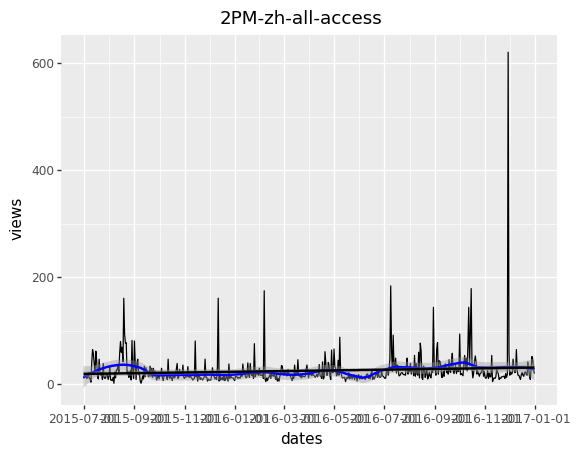

<ggplot: (190650717476)>

In [23]:
plot_rownr(1)

In [24]:
def plot_rownr_log(rownr):
    art=tpages['article'][rownr]
    loc=tpages['locale'][rownr]
    acc=tpages['access'][rownr]
    dateView=extract_ts_nrm(rownr)
    dateView["dates"] = pd.to_datetime(dateView['dates'])
    return ggplot(dateView,aes(x='dates',y='views'))+ geom_line()+geom_smooth(color = "blue", span = 1/5)+ stat_smooth(method = "lm") +labs(title = art+"-"+loc+"-"+acc)
    labs(title = art+"-"+loc+"-"+acc)+scale_y_log10() + labs(y = "log views")
    

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


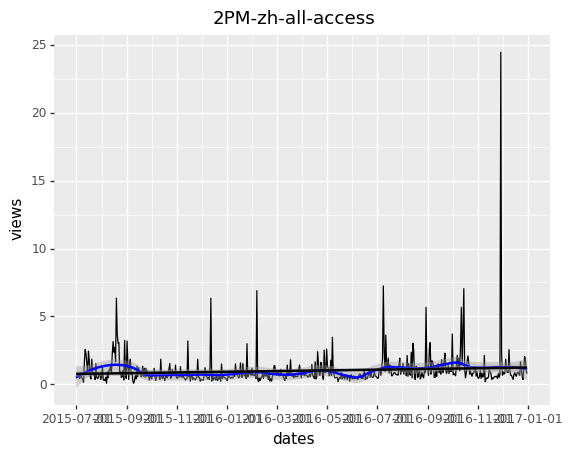

<ggplot: (190695121451)>

In [25]:
plot_rownr_log(1)

In [26]:
def plot_rownr_zoom(rownr, start, end):
    art=tpages['article'][rownr]
    loc=tpages['locale'][rownr]
    acc=tpages['access'][rownr]
    dateView=extract_ts_nrm(rownr)
    dateView["dates"] = pd.to_datetime(dateView['dates'])
    startDate=datetime.strptime(start , '%Y-%m-%d')
    endDate=datetime.strptime(end , '%Y-%m-%d')
    dateView=dateView[(dateView["dates"]>=startDate) & (dateView["dates"]<=endDate) ]
    #return dateView
    return ggplot(dateView,aes(x='dates',y='views'))+ geom_line()+geom_smooth(color = "blue", span = 1/5)+ stat_smooth(method = "lm") +labs(title = art+"-"+loc+"-"+acc)
    labs(title = art+"-"+loc+"-"+acc)+scale_y_log10() + labs(y = "log views")

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


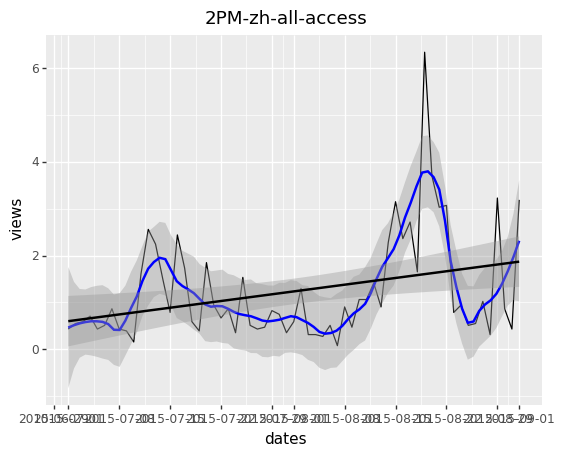

<ggplot: (190695165858)>

In [27]:
plot_rownr_zoom(1,'2015-03-01','2015-09-01')

In addition, with the help of the extractor tool we define a function that re-connects the Page information to the corresponding time series and plots this curve according to our specification on article name, access type, and agent for all the available languages:

In [28]:
def plot_names(art, acc, ag):
    pick=tpages[(tpages['article']==art) & (tpages['access']==acc) & (tpages['agent']==ag)]
    pick_nr=pick['rowname']
    pick_loc=pick['locale']
    tdat= extract_ts(pick_nr.values[0])
    tdat["loc"]=pick_loc.values[0]
    for i in range(1,len(pick)):
        foo= extract_ts(pick_nr.values[i])
        foo["loc"]=pick_loc.values[i]
        tdat=pd.concat([tdat,foo])
    tdat["dates"] = pd.to_datetime(tdat['dates'])
    plt=ggplot(tdat,aes(x='dates',y='views',color = tdat["loc"]))+geom_line() + labs(title = art+"-"+acc+"-"+ag)
    return plt
def plot_names_nrm(art, acc, ag):
    pick=tpages[(tpages['article']==art) & (tpages['access']==acc) & (tpages['agent']==ag)]
    pick_nr=pick['rowname']
    pick_loc=pick['locale']
    tdat= extract_ts_nrm(pick_nr.values[0])
    tdat["loc"]=pick_loc.values[0]
    for i in range(1,len(pick)):
        foo= extract_ts(pick_nr.values[i])
        foo["loc"]=pick_loc.values[i]
        tdat=pd.concat([tdat,foo])
    tdat["dates"] = pd.to_datetime(tdat['dates'])
    plt=ggplot(tdat,aes(x='dates',y='views',color = tdat["loc"]))+geom_line() + labs(title = art+"-"+acc+"-"+ag)
    return plt


C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


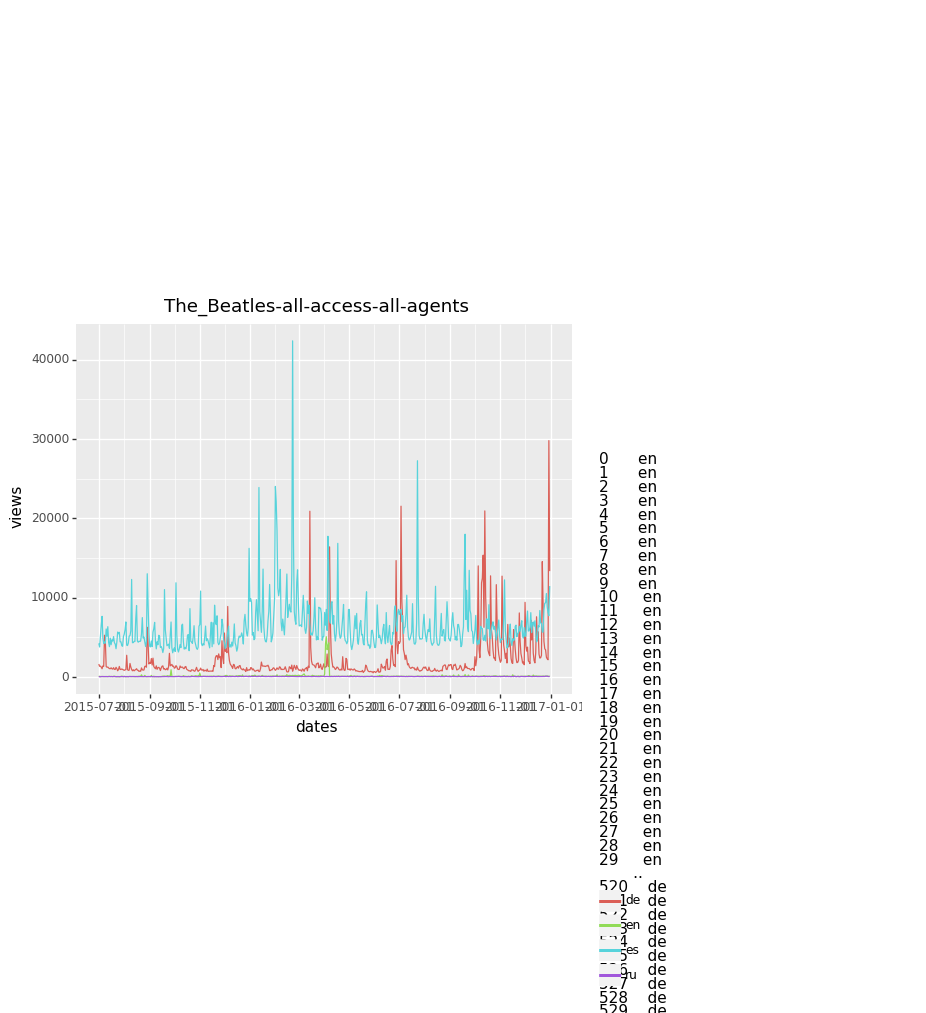

<ggplot: (-9223371846250649172)>

In [29]:
plot_names("The_Beatles", "all-access", "all-agents")

These are the tools we need for a visual examinination of arbitrary individual time series data. In the following, we will use them to illustrate specific observations that are of particular interest.

## 3 Summary parameter extraction
In the next step we will have a more global look at the population parameters of our training time series data. Also here, we will start with the wikipedia data. The idea behind this approach is to probe the parameter space of the time series information along certain key metrics and to identify extreme observations that could break our forecasting strategies.

## 3.1 Projects data overview
Before diving into the time series data let’s have a look how the different meta-parameters are distributed:

C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


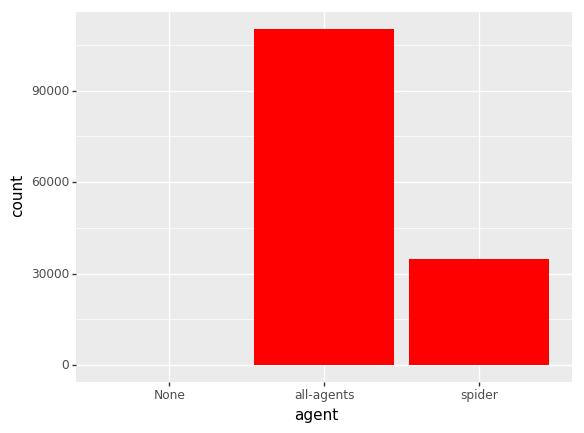

<ggplot: (190648642119)>

In [30]:
ggplot(tpages, aes(x='agent')) + geom_bar(fill = "red")


C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


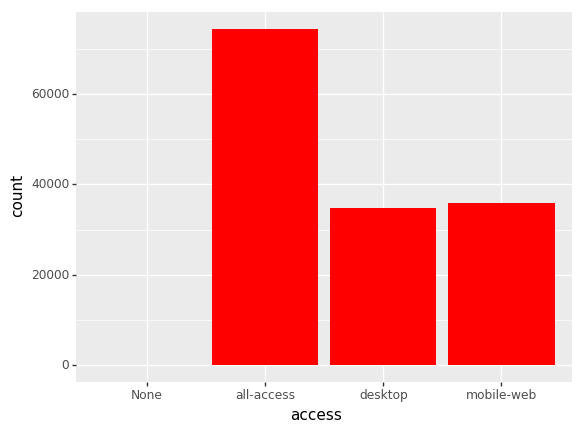

<ggplot: (190648666309)>

In [31]:
ggplot(tpages, aes(x='access')) + geom_bar(fill = "red")


C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


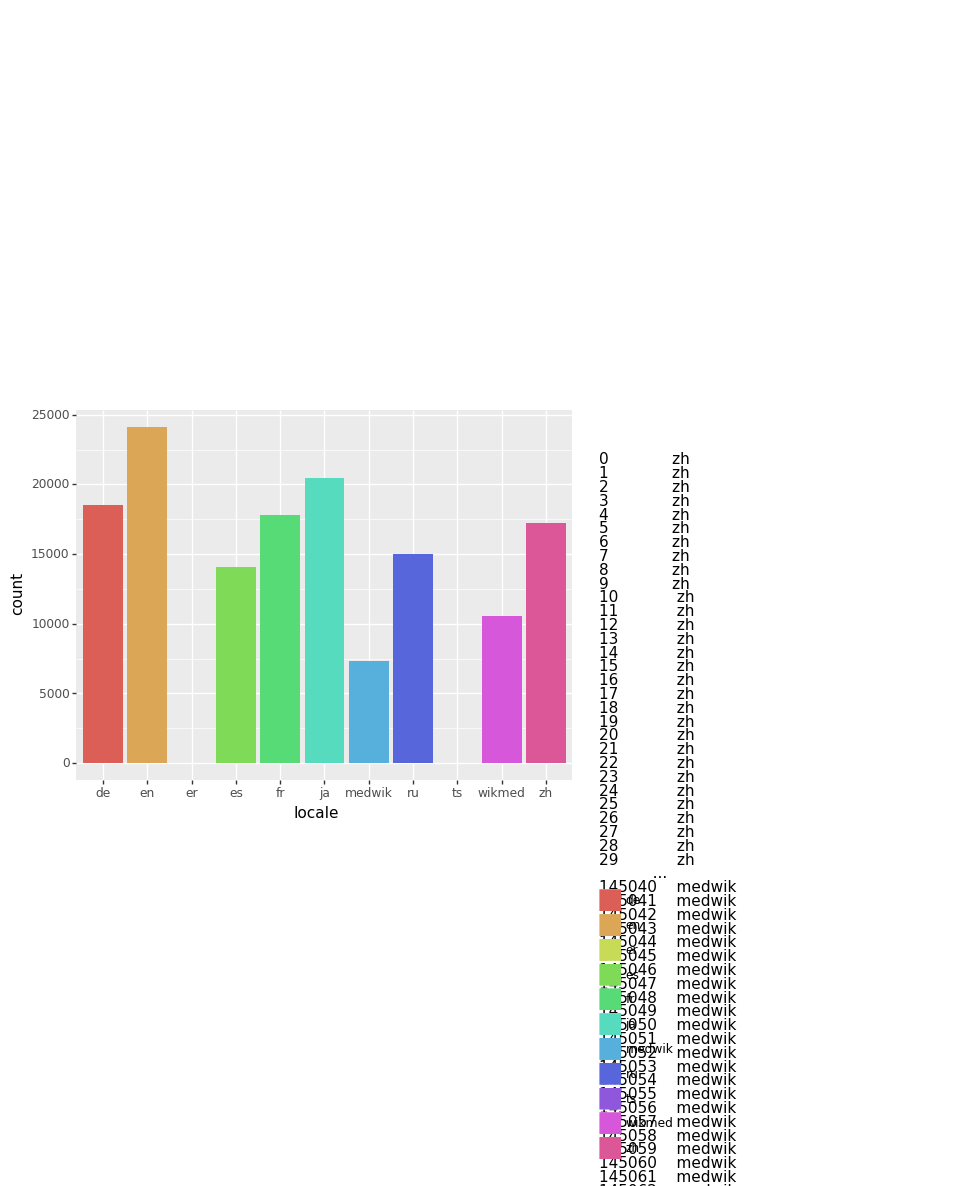

<ggplot: (190648600703)>

In [32]:
ggplot(tpages, aes(x='locale', fill=tpages['locale'])) + geom_bar()

We find that our wikipedia data includes 7 languages: German, English, Spanish, French, Japanese, Russian, and Chinese. All of those are more frequent than the mediawiki and wikimedia pages. Mobile sites are slightly more frequent than desktop ones

## 3.2 Basic time series parameters
We start with a basic set of parameters: mean, standard deviation, amplitude, and a the slope of a naive linear fit. This is our extraction function:

In [33]:
param= pd.DataFrame(columns={'rowname','slope','min_view','max_view','mean_view','med_view','sd_view'})
def params_ts1(rownr):
    dateView=extract_ts(rownr)
    dateView["dates"] = pd.to_datetime(dateView['dates'])
    y=dateView["views"]
    x= dateView[["dates"]]
    model= lm.LinearRegression()
    results=model.fit(x,y)
    param['rowname'] = rownr
    param['slope']= model.coef_
    param['min_view'] = np.min(dateView["views"])
    param['max_view'] = np.max(dateView["views"])
    param['mean_view'] = np.mean(dateView["views"])
    param['med_view'] = np.median(dateView["views"])
    param['sd_view'] = np.std(dateView["views"])
    return param

And here we run it. (Note, that in this kernel version I’m currently using a sub-sample of the data for reasons of runtime. My extractor function is not very elegant, yet, and exceeds the kernel runtime for the complete data set.)

In [34]:
x=np.random.choice(tpages["rowname"], size=5500)
x.astype(object)

array([83779, 90203, 102827, ..., 63937, 31909, 122732], dtype=object)

In [35]:
joinedParam= pd.DataFrame(columns={'rowname','slope','min_view','max_view','mean_view','med_view','sd_view'})
for i in x:
    dateView=extract_ts(i)
    dateView["dates"] = pd.to_datetime(dateView['dates']) 
    if not dateView["views"].isnull().values.any():
        joinedParam=pd.concat([joinedParam,params_ts1(i)])
joinedParam.index=joinedParam["rowname"]

## 3.3 Overview visualisations
Let’s explore the parameter space we’ve built. (The global shape of the distributions should not be affected by the sampling.) First we plot the histograms of our main parameters:

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


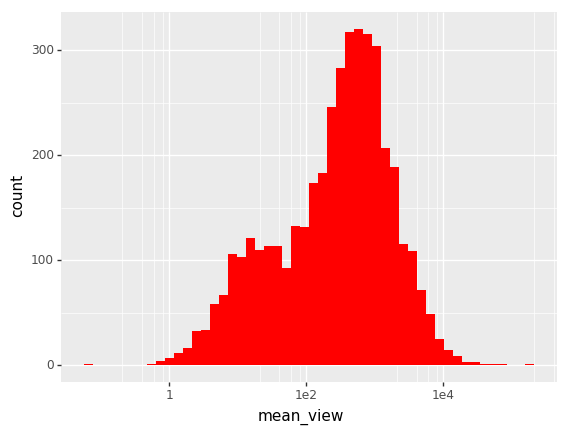

<ggplot: (-9223371846206220905)>

In [36]:
ggplot(joinedParam, aes(x='mean_view'))+geom_histogram(fill = "red", bins = 50) + scale_x_log10()

C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_bin : Removed 4 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


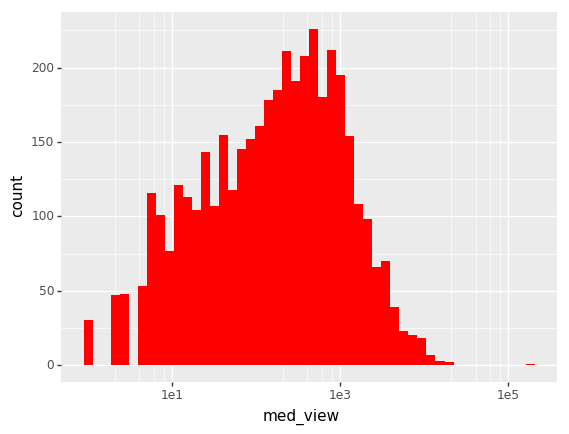

<ggplot: (190598744626)>

In [37]:
ggplot(joinedParam, aes(x='med_view'))+geom_histogram(fill = "red", bins = 50) + scale_x_log10()

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


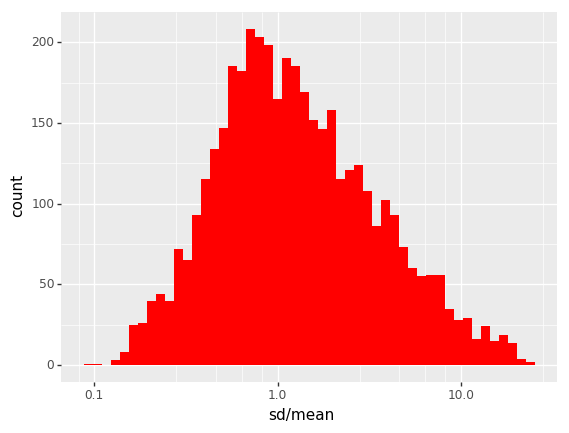

<ggplot: (190652485994)>

In [38]:
difsdmean= pd.DataFrame(columns=["sd/mean"])
difsdmean["sd/mean"]=np.array(joinedParam["sd_view"])/np.array(joinedParam["mean_view"])
ggplot(difsdmean, aes(x='sd/mean'))+geom_histogram(fill = "red", bins = 50) + scale_x_log10()

C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: invalid value encountered in log10
  return self.trans.transform(x)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_bin : Removed 1523 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


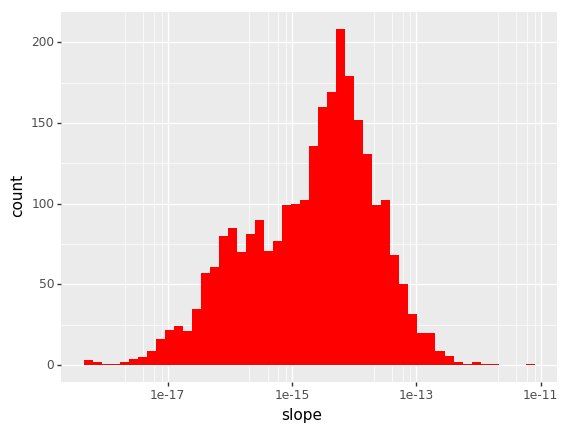

<ggplot: (-9223371846202273234)>

In [39]:
ggplot(joinedParam, aes(x='slope'))+geom_histogram(fill = "red", bins = 50) + scale_x_log10()

We find:

-  The distribution of average views is clearly bimodal, with peaks around 10 and 200-300 views. Something similar is true for the number of maximum views, although here the first peak (around 200) is curiuosly narrow. The second peak is centred above 10,000.

-  The distribution of standard deviations (divided by the mean) is skewed toward higher values with larger numbers of spikes or stronger variability trends. Those will be the observations that are more challenging to forecast.

-  The slope distribution is resonably symmetric and centred notably above zero.

In [40]:
#par_page= tpages.join(joinedParam,on="rowname",lsuffix="l",rsuffix="r")
#par_page
par_page= tpages.merge(joinedParam,on="rowname")
par_page

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'rowname' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


access   agent                          article locale  rowname  \
0     all-access  spider                            AKB48     zh        8   
1     all-access  spider                         I'm_Home     zh       72   
2     all-access  spider                           SHINee     zh      130   
3     all-access  spider                     Super_Junior     zh      140   
4     all-access  spider                          X_Japan     zh      170   
5     all-access  spider                               佛教     zh      203   
6     all-access  spider                               佛教     zh      203   
7     all-access  spider                   一個中國_(中華人民共和國)     zh      228   
8     all-access  spider                              王嘉爾     zh      268   
9     all-access  spider                              崔宇植     zh      305   
10    all-access  spider                            冰與火之歌     zh      318   
11    all-access  spider                               商鞅     zh      328   
12    all-access  spider                             迪丽热巴     zh      369   
13    all-access  spider                          流感_(電影)     zh      370   
14    all-access  spider                               王楠     zh      402   
15    all-access  spider                             三民主義     zh      449   
16    all-access  spider                             妖夜尋狼     zh      474   
17    all-access  spider                         香港電子競技戰隊     zh      508   
18    all-access  spider                               黄渤     zh      539   
19    all-access  spider                            鲍勃·迪伦     zh      562   
20    all-access  spider                              愛黛兒     zh      564   
21    all-access  spider                          亚伯拉罕·林肯     zh      576   
22    all-access  spider                               珀斯     zh      582   
23    all-access  spider                               張晉     zh      591   
24    all-access  spider                             還珠格格     zh      678   
25    all-access  spider                              沈富雄     zh      708   
26    all-access  spider                             監獄學園     zh      710   
27    all-access  spider                              張善為     zh      723   
28    all-access  spider                              崔泰俊     zh      740   
29    all-access  spider                          亞人_(漫畫)     zh      748   
...          ...     ...                              ...    ...      ...   
4859  all-access  spider                   Muro_de_Berlín     es   126343   
4860  all-access  spider                   Bulbo_raquídeo     es   126367   
4861  all-access  spider             Cien_años_de_soledad     es   126379   
4862  all-access  spider             Cien_años_de_soledad     es   126379   
4863  all-access  spider                      Éver_Banega     es   126404   
4864  all-access  spider                Bibiana_Fernández     es   126416   
4865  all-access  spider      Región_Amazónica_(Colombia)     es   126430   
4866  all-access  spider           Guerra_de_los_Mil_Días     es   126498   
4867  all-access  spider                   Día_de_la_Raza     es   126528   
4868  all-access  spider     Modelo_atómico_de_Rutherford     es   126539   
4869  all-access  spider                           Ángulo     es   126571   
4870  all-access  spider                      Ana_Obregón     es   126582   
4871  all-access  spider             Máximo_común_divisor     es   126594   
4872  all-access  spider                    Penélope_Cruz     es   126718   
4873  all-access  spider                           Volcán     es   126728   
4874  all-access  spider                          Energía     es   126731   
4875  all-access  spider               Enrique_Peña_Nieto     es   126736   
4876  all-access  spider                  Ciencia_ficción     es   126751   
4877  all-access  spider                          Beyoncé     es   126787   
4878  all-access  spider           Pablo_Iglesias_Turrión     es   126818   
4879  

Let’s split it up by locale and focus on the densities:

C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_density : Removed 49 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals =

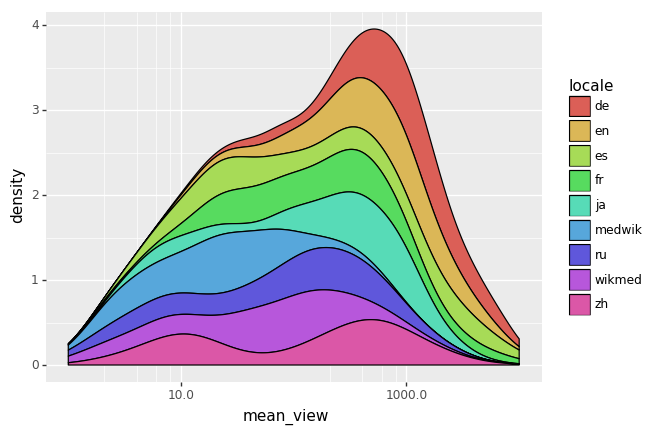

<ggplot: (190652572592)>

In [41]:
ggplot(par_page, aes(x='mean_view', fill='locale'))+ geom_density(position = "stack") +scale_x_log10(limits = [1,1e4]) 


C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_density : Removed 1674 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals

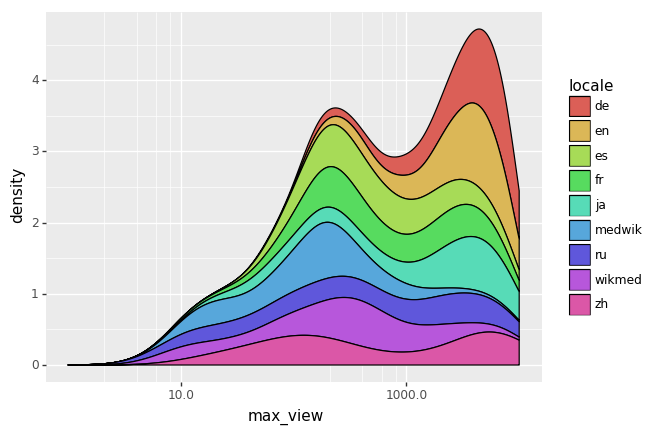

<ggplot: (190648424512)>

In [42]:
ggplot(par_page, aes(x='max_view', fill='locale'))+ geom_density(position = "stack") +scale_x_log10(limits = [1,1e4]) 


C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position_stack.py:82: FutureWarning: Sorting because non-concatenation axis is

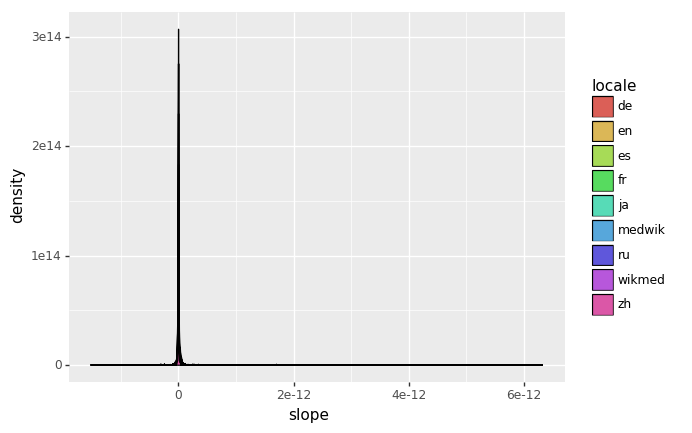

<ggplot: (190648907840)>

In [43]:
ggplot(par_page, aes(x='slope', fill='locale'))+ geom_density(position = "stack") 

C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_density : Removed 145 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals 

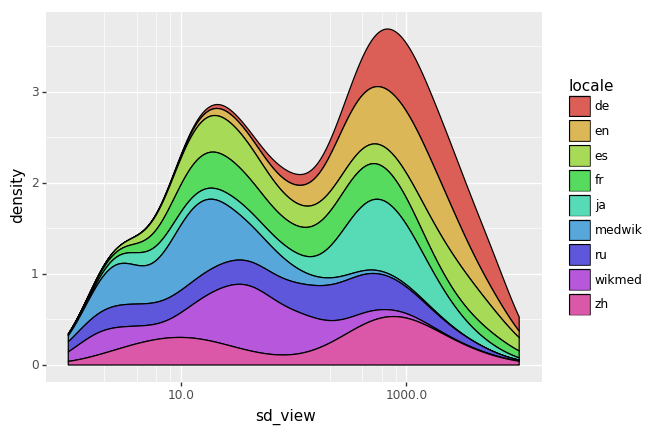

<ggplot: (-9223371846202060400)>

In [44]:
ggplot(par_page, aes(x='sd_view', fill='locale'))+ geom_density(position = "stack") +scale_x_log10(limits = [1,1e4]) 

In [45]:
twoDgraph= pd.DataFrame(columns=["max-mean","mean_view"])
twoDgraph["max-mean"]= np.array(joinedParam["max_view"])-np.array(joinedParam["mean_view"])
twoDgraph["mean_view"]= joinedParam["mean_view"].values

We find:

-  The chinese pages (zh, in pink) are slightly but notably different from the rest. The have lower mean and max views and also less variation. Their slope distribution is broader, but also shifted more towards positive values compared to the other curves.

-  The peak in max views around 200-300 is most pronounced in the french pages (fr, in turquoise).

-  The english pages (en, in mustard) have the highest mean and maximum views, which is not surprising.

Next, we will examine binned 2-d histograms.

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


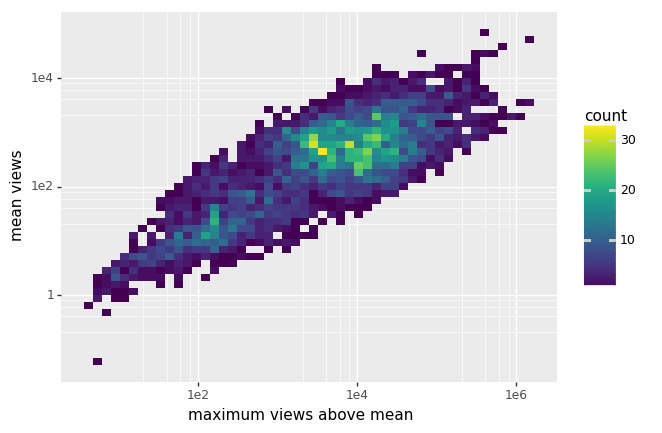

<ggplot: (190652706957)>

In [46]:
ggplot(twoDgraph,aes(x="max-mean",y="mean_view"))+geom_bin2d(bins = [50,50]) +scale_x_log10() +scale_y_log10() + labs(x = "maximum views above mean", y = "mean views")

We find:

-  There is a clear correlation between mean views and maximum views. Also here we find again the two cluster peaks we had identified in the individual histograms. A couple of outliers and outlier groups are noticeable.
Let’s zoom into the upper right corner (the numbers in parentheses are the row numbers):

In [47]:
twoDgraph.size

8380

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 4054 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


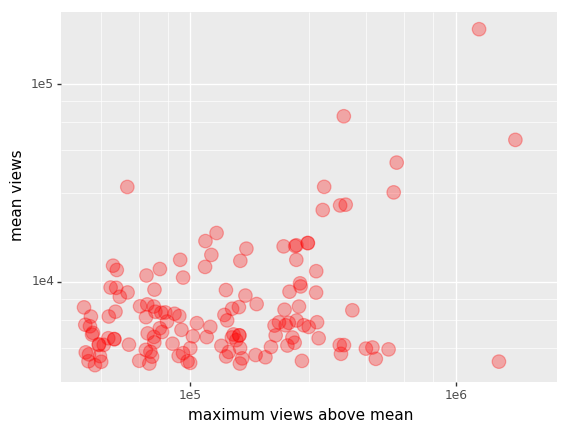

<ggplot: (190652476210)>

In [48]:
limx = [max(joinedParam["max_view"]/50), max(joinedParam["max_view"])]
limy = [max(joinedParam["mean_view"]/50), max(joinedParam["mean_view"])]
ggplot(twoDgraph,aes(x="max-mean",y="mean_view"))+ geom_point(size = 5, color = "red", alpha=0.3) +scale_x_log10(limits=limx) +scale_y_log10(limits=limy) + labs(x = "maximum views above mean", y = "mean views") 

Here we find a number of main pages and other meta pages (in the full data set).

Another question: Does the (assumed) linear change in views depend on the total number of views?

C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\scales\scale.py:516: RuntimeWarning: invalid value encountered in log10
  return self.trans.transform(x)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 1523 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


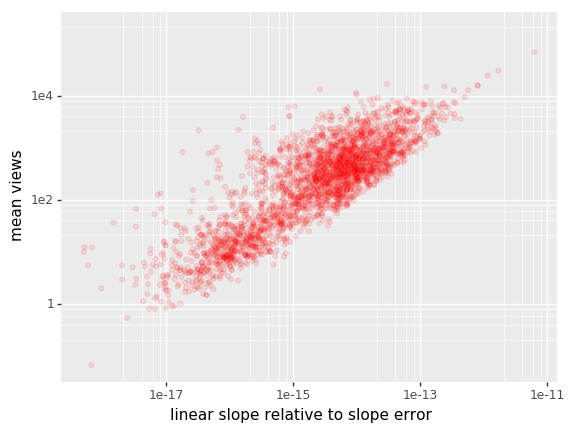

<ggplot: (190652476224)>

In [49]:
ggplot(joinedParam,aes(x='slope',y='mean_view'))+geom_point(color = "red", alpha = 0.1) +scale_y_log10()+scale_x_log10() +labs(x = "linear slope relative to slope error", y = "mean views")

We find that articles with higher average view-count have more variability in their linear trends. However, this might be due to our slope normalisation which will decrease the effective slope for low view counts. It should not, however, affect the observation that the slopes of low-view articles are on average slightly higher than those of high-view articles. Such an effect could be caused by viewing spikes, of course, but I would expect those to be randomly distributed.

## 4 Individual observations with extreme parameters
Based on the overview parameters we can focus our attention on those articles for which the time series parameters are at the extremes of the parameter space.

# 4.1 Large linear slope
Those are the observations with the highest slope values. (In the sample this will be different, but in the full wikipedia data set the top 10 have rownames 91728, 55587, 108341, 70772, 95367, 18357, 95229, 116150, 94975, 77292).

In [50]:
slopesort=joinedParam.sort_values(by='slope',ascending=False).head(n=5)

Let’s have a look at the time series data of the top 4 articles:

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


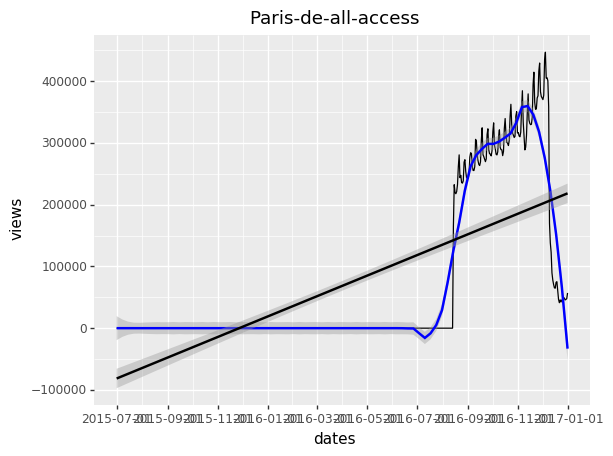

<ggplot: (190652601762)>

In [60]:
plot_rownr(int(slopesort['rowname'].values[0]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


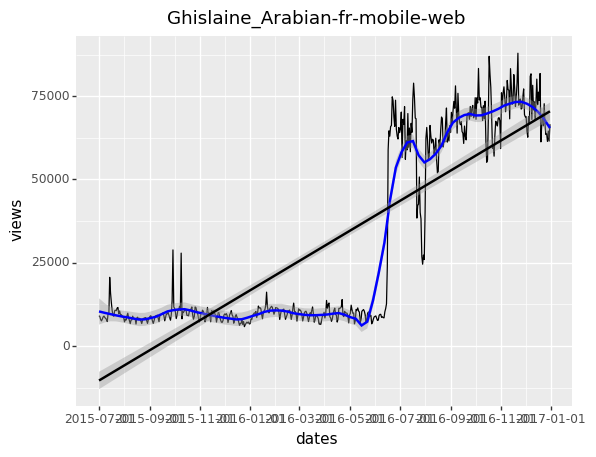

<ggplot: (190607411832)>

In [62]:
plot_rownr(int(slopesort['rowname'].values[1]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


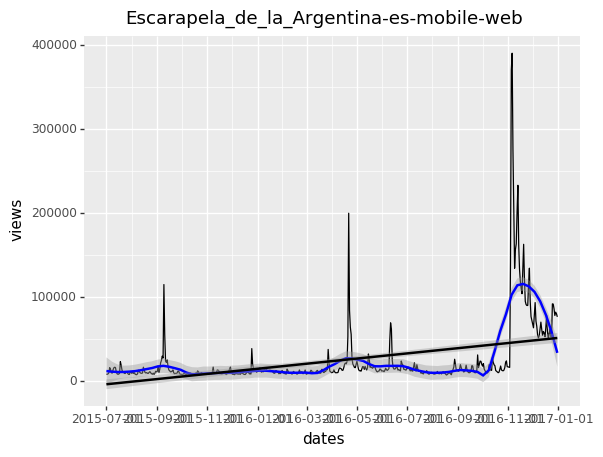

<ggplot: (-9223371846247377997)>

In [63]:
plot_rownr(int(slopesort['rowname'].values[2]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


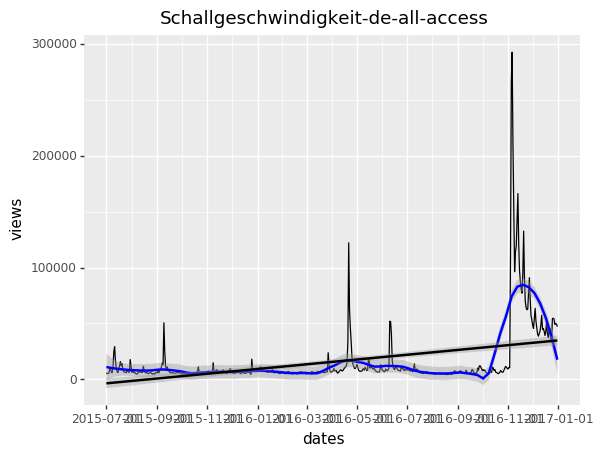

<ggplot: (-9223371846202655281)>

In [64]:
plot_rownr(int(slopesort['rowname'].values[3]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


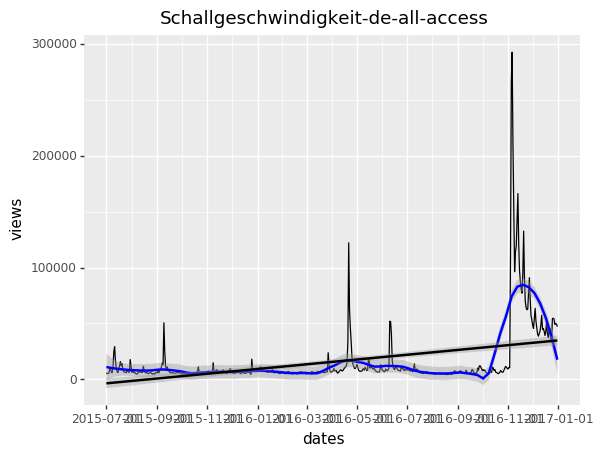

<ggplot: (-9223371846205868351)>

In [65]:
plot_rownr(int(slopesort['rowname'].values[4]))

We find:

Lot’s of love for Twenty One Pilots in Spain. Those rapid rises and wibbly-wobbly bits are going to be difficult to predict, unless there’s a periodic modulation on top of the large-scale trend. Certaintly worth figuring out.

We also see that our generic loess smoother is dealing rather well with most of the slower variability patterns and could be used to remove the low-frequency structures for further analysis.

Let’s compare the interest in Twenty One Pilots for the different countries, to see whether a prediction for one of them could learn from the others:

C:\Users\Admin\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


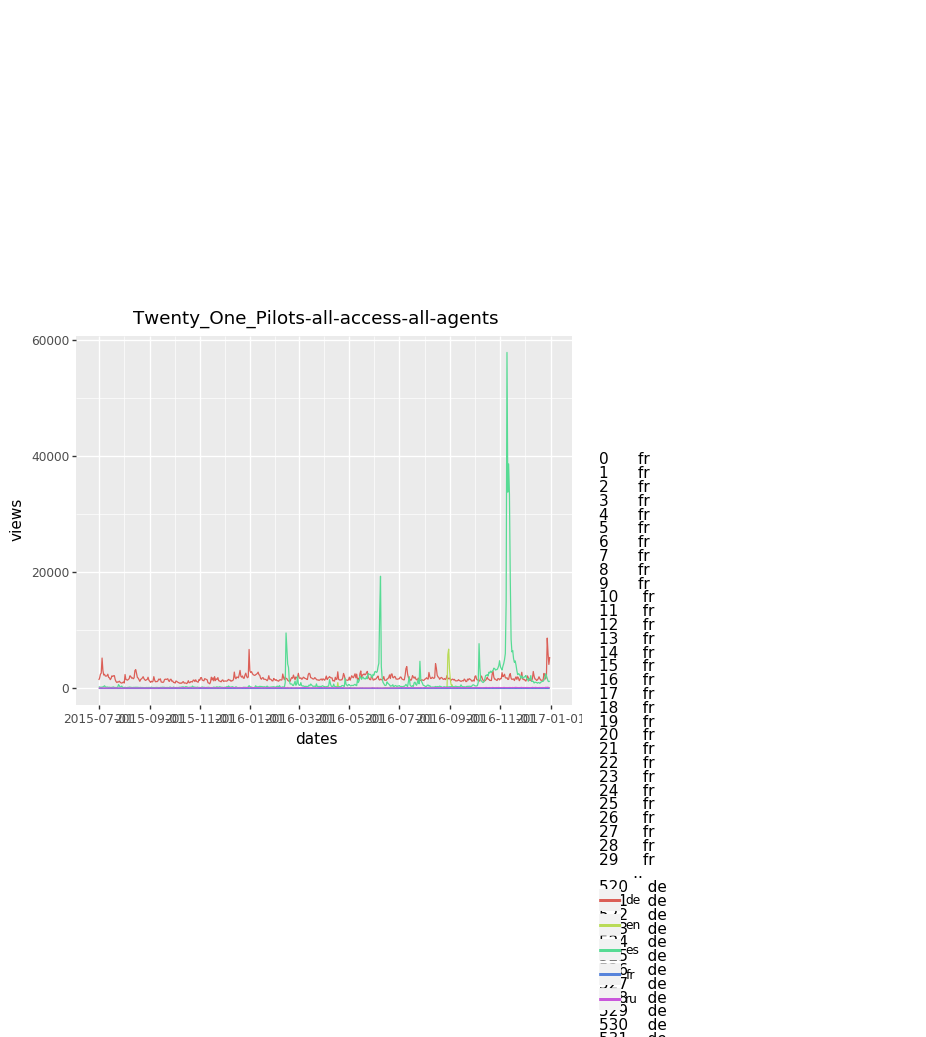

<ggplot: (-9223371846202510823)>

In [66]:
plot_names_nrm("Twenty_One_Pilots", "all-access", "all-agents")

Note, that those curves are normalised to mean views (each) and have a logarithmic y-axis to mitigate the effect of large spikes. This chart is for relative trend comparison.

We find:

-  Germany and France show quite similar viewing behaviour, while Russia and Spain are comparable too; especially in the early rise in interest. The English pages show less dramatic changes but end up

-  With a purely time-series-forecast approach I think that the large spikes are close to impossible to predict. However, external data could help a lot here.

-  Those viewing numbers were going up, but which articles were going down? (Top 10: 95856, 74115, 8388, 103659, 100213, 9633, 102481 38458, 30042, 74002

In [67]:
#Article going down
articleAscending=joinedParam.sort_values(by='slope',ascending=True).head(n=5)
articleAscending

max_view  min_view  med_view        sd_view         slope  \
rowname                                                                
101457.0   638556.0   12119.0   22068.5   88932.764827 -1.512772e-12   
42059.0   1728694.0     274.0     544.5  169174.680531 -1.246962e-12   
99537.0   1412292.0   85970.0  181508.5   77589.183380 -9.844988e-13   
13053.0    611564.0    3746.0   12335.0   58739.412784 -9.217630e-13   
9632.0      38175.0     929.0    4632.5   11589.032011 -7.583681e-13   

              mean_view   rowname  
rowname                            
101457.0   39924.494545  101457.0  
42059.0    52019.338182   42059.0  
99537.0   188662.325455   99537.0  
13053.0    28224.632727   13053.0  
9632.0     11632.840000    9632.0

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


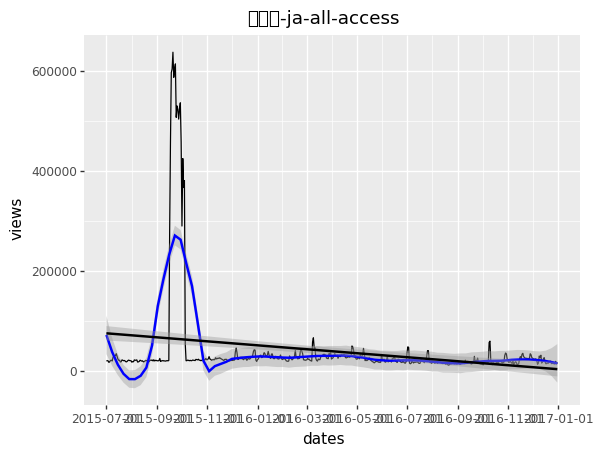

<ggplot: (190652209363)>

In [69]:
plot_rownr(int(articleAscending['rowname'].values[0]))


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


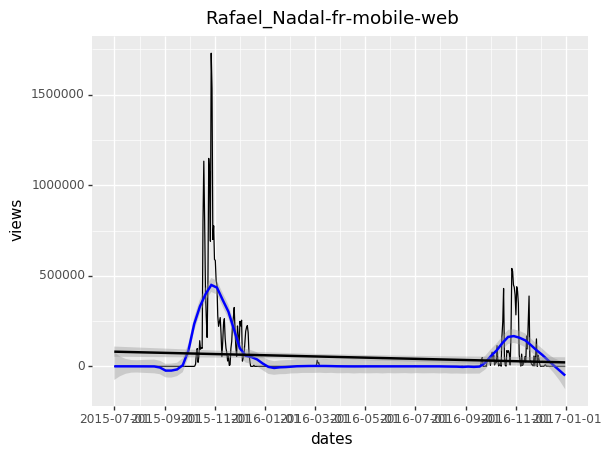

<ggplot: (190652114559)>

In [70]:
plot_rownr(int(articleAscending['rowname'].values[1]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


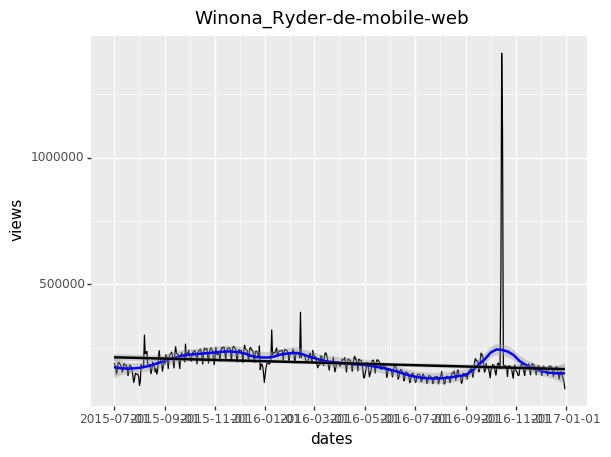

<ggplot: (190652202493)>

In [71]:
plot_rownr(int(articleAscending['rowname'].values[2]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


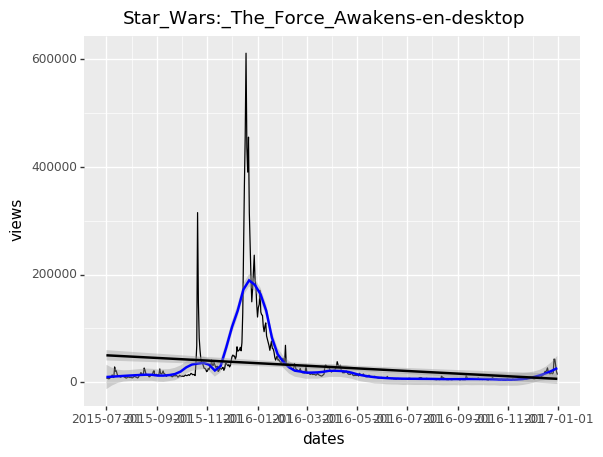

<ggplot: (-9223371846202419540)>

In [72]:
plot_rownr(int(articleAscending['rowname'].values[3]))

The main page itself on mobile, and review articles on 2015 were the biggest losers.

## 4.2 High standard deviations
The top 10 wikipedia rows are 9775, 38574, 103124, 99323, 74115, 39181, 10404, 33645, 34258, and 26994. Bingo, anyone?



In [73]:
# 4.2 High standard deviations
joinedParam['sd_div_mean']= joinedParam['sd_view']/joinedParam['mean_view']
sddivsort=joinedParam.sort_values(by='sd_div_mean',ascending=True).head(n=5)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


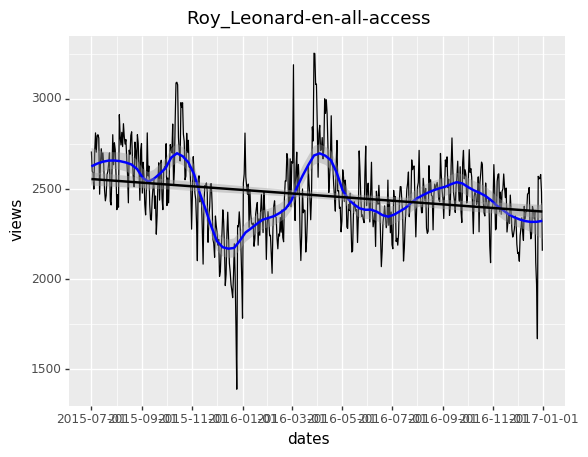

<ggplot: (-9223371846202614966)>

In [74]:
#plot 4 graphs
plot_rownr(int(sddivsort['rowname'].values[0]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


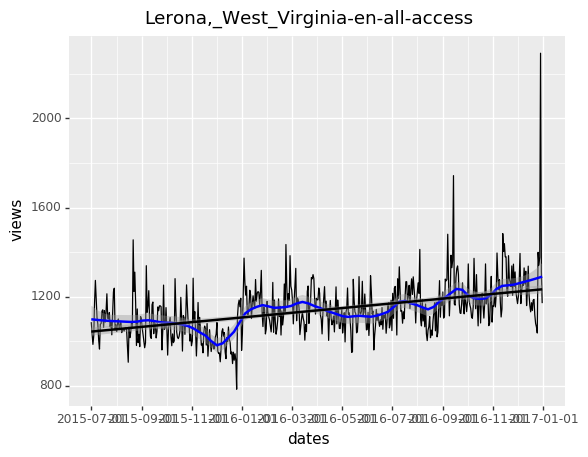

<ggplot: (190652361683)>

In [75]:
plot_rownr(int(sddivsort['rowname'].values[1]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


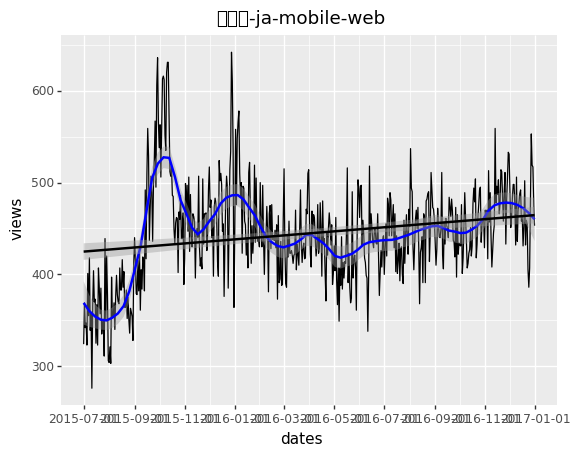

<ggplot: (-9223371846202264106)>

In [76]:
plot_rownr(int(sddivsort['rowname'].values[2]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


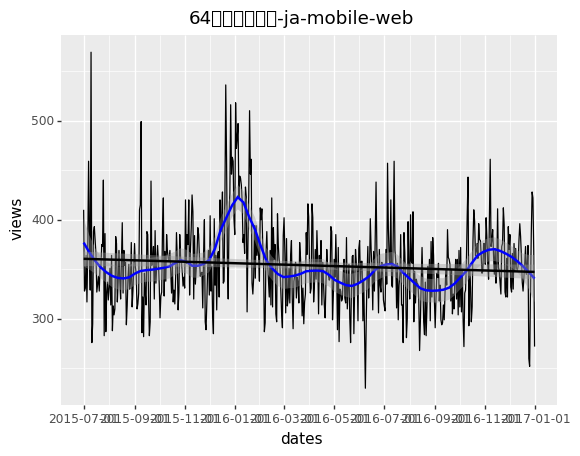

<ggplot: (-9223371846159100009)>

In [77]:
plot_rownr(int(sddivsort['rowname'].values[3]))

Those are pretty strong spikes in the main page views, even if the baseline is around 1-10 million to begin with. They look consistent though over different languages. Any ideas what could cause this?

If we normalise standard deviation by mean we get a different set of results:

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


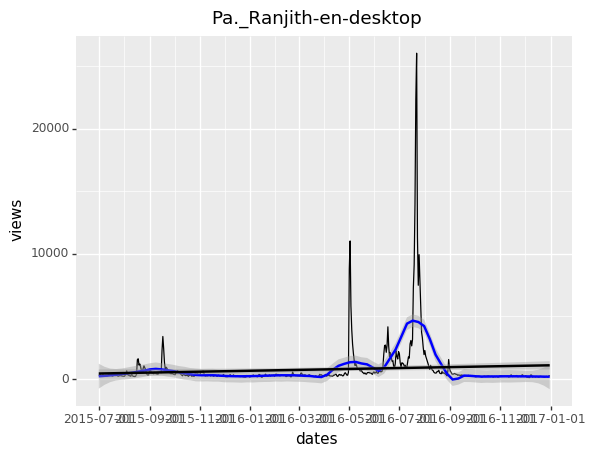

<ggplot: (190691117902)>

In [78]:
plot_rownr(10032)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


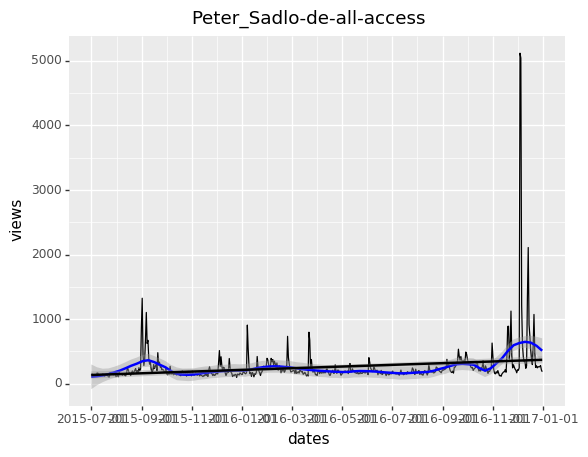

<ggplot: (190652327081)>

In [79]:
plot_rownr(38812)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


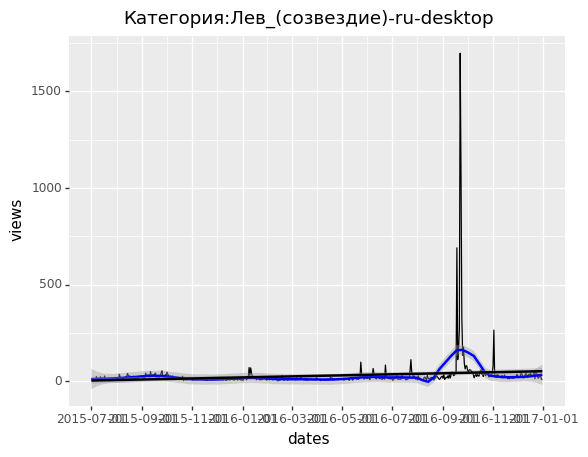

<ggplot: (190651941524)>

In [80]:
plot_rownr(86905)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


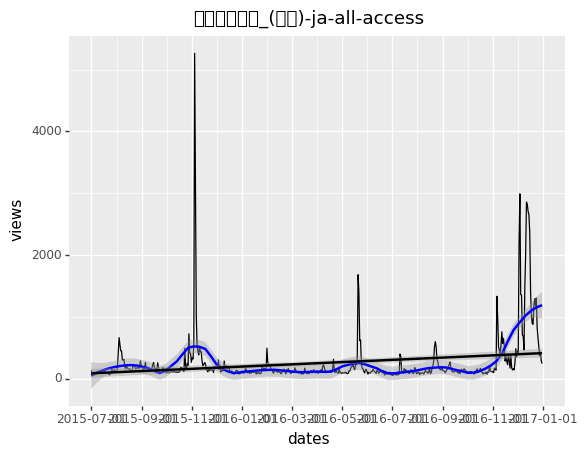

<ggplot: (-9223371846202371647)>

In [81]:
plot_rownr(102521)

Those are very, very suspicious. They are essentially low baselines with single dates that have way higher view counts (e.g. around 20 vs 2 million for the upper left one). These have to be errors in the data which can be dangerous for predictions if they appear close to either end of the date window. In other cases, most smoothing methods should be able to deal with them.

# 4.3 Large variability amplitudes
The top amplitudes are the same as the top standard deviations, due to the spikey nature of the variability:

In [82]:
#Large variability amplitudes
joinedParam['maxView_meanView']= joinedParam['max_view']-joinedParam['mean_view']
maxView_meanViewSort=joinedParam.sort_values(by='maxView_meanView',ascending=False).head(n=5)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


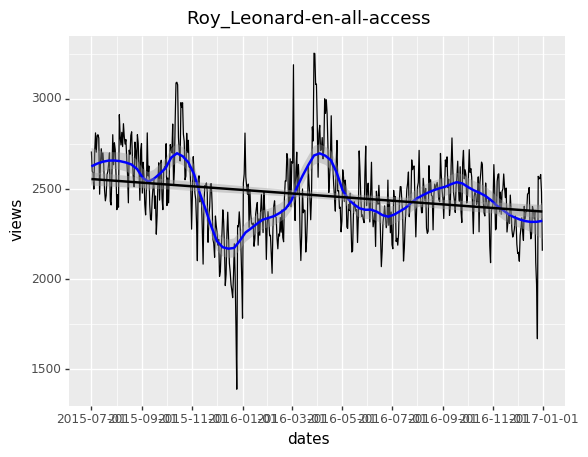

<ggplot: (-9223371846248467368)>

In [83]:
plot_rownr(int(sddivsort['rowname'].values[0]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


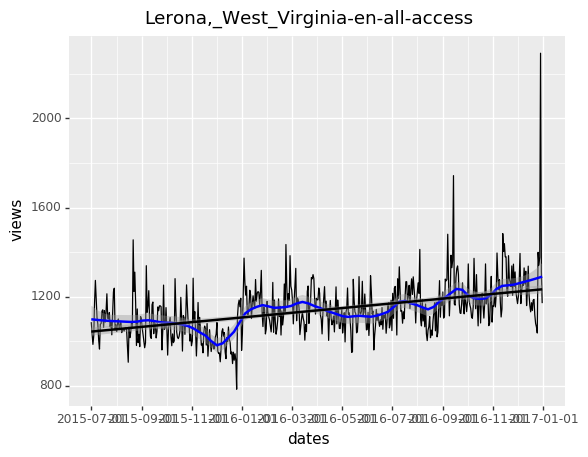

<ggplot: (190652282481)>

In [84]:
plot_rownr(int(sddivsort['rowname'].values[1]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


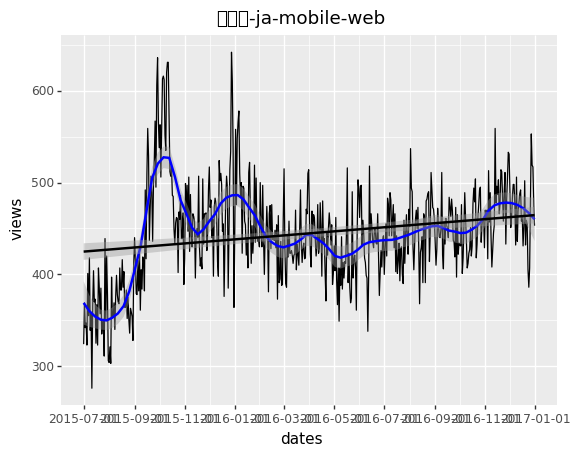

<ggplot: (190652285623)>

In [85]:
plot_rownr(int(sddivsort['rowname'].values[2]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


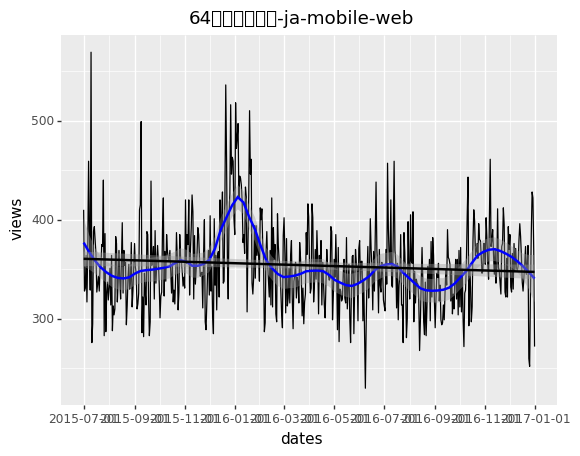

<ggplot: (190652232368)>

In [86]:
plot_rownr(int(sddivsort['rowname'].values[3]))

# 4.4 High average views
Those are the time series of the most popular pages, which we already identified as the main pages in the plots above:

In [87]:
meandescSort=joinedParam.sort_values(by='mean_view',ascending=False).head(n=5)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


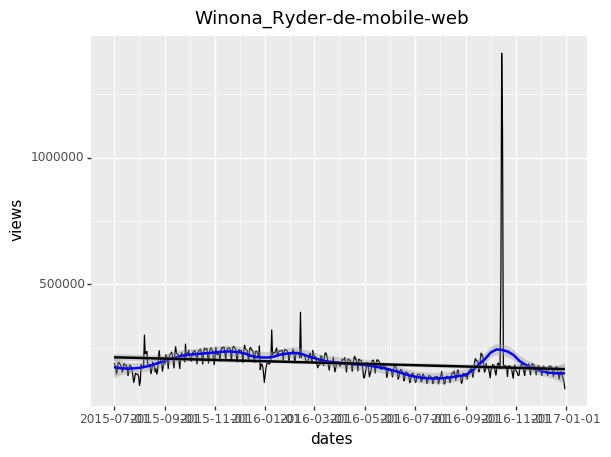

<ggplot: (190652350805)>

In [88]:
plot_rownr(int(meandescSort['rowname'].values[0]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


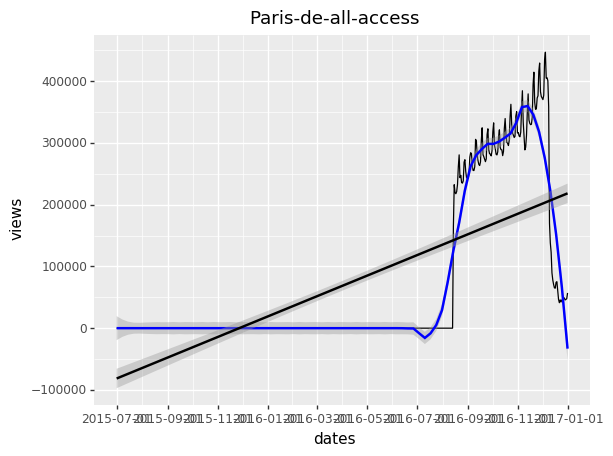

<ggplot: (190648438925)>

In [89]:
plot_rownr(int(meandescSort['rowname'].values[1]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


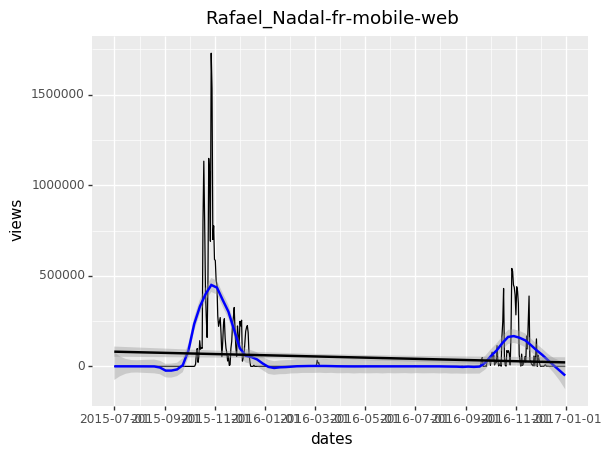

<ggplot: (190695211128)>

In [90]:
plot_rownr(int(meandescSort['rowname'].values[2]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


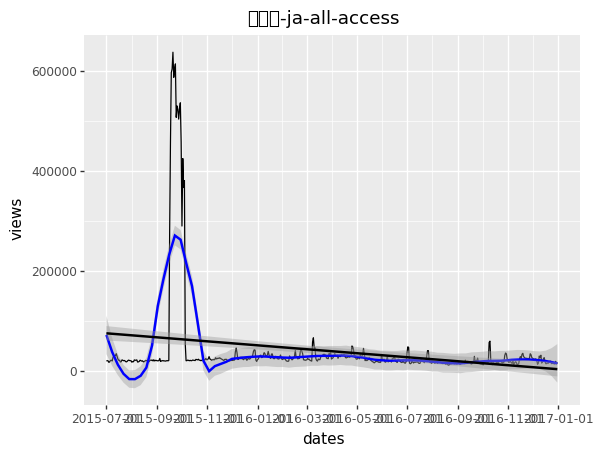

<ggplot: (-9223371846206140223)>

In [91]:
plot_rownr(int(meandescSort['rowname'].values[3]))

In addition to the spikes on the english main page there is a suprising amount of variability as exemplified by the long-term structure in the German main page.

What about other main pages, as identified in the zoom-in above?

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


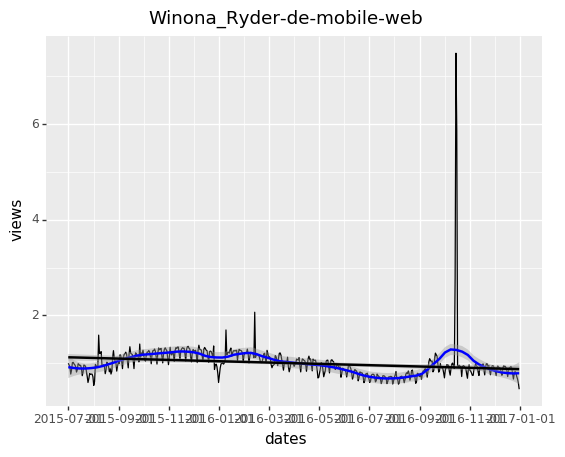

<ggplot: (190652373196)>

In [93]:
plot_rownr_log(int(meandescSort['rowname'].values[0]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


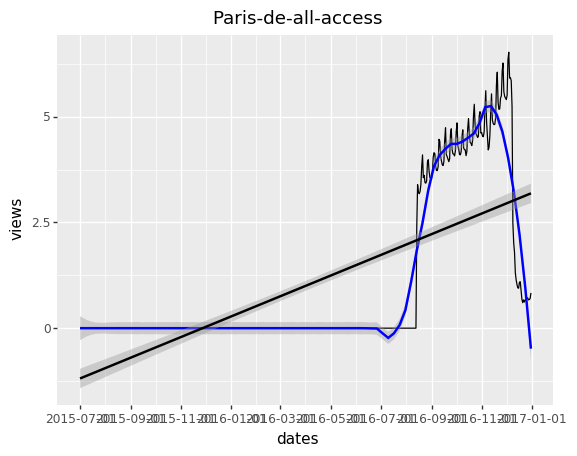

<ggplot: (190652601913)>

In [94]:
plot_rownr_log(int(meandescSort['rowname'].values[1]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


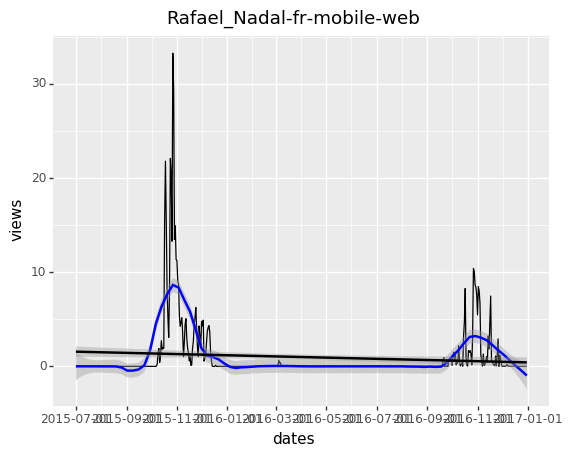

<ggplot: (190652592311)>

In [95]:
plot_rownr_log(int(meandescSort['rowname'].values[2]))

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


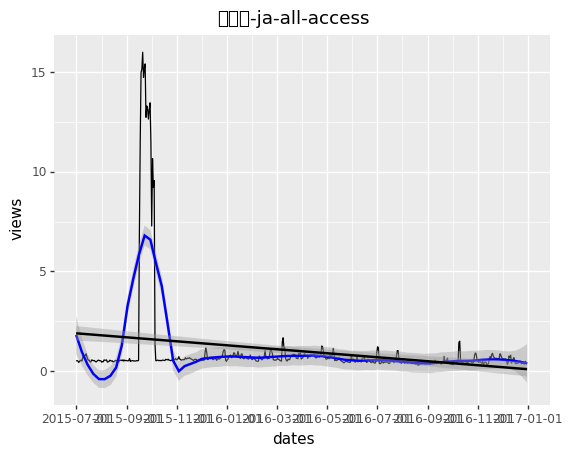

<ggplot: (-9223371846205853973)>

In [96]:
plot_rownr_log(int(meandescSort['rowname'].values[3]))

Here 3 of the 4 plots have a logarithmic y-axis to improve the clarity of visualising the time series’ with strong spikes. We see that also those popular pages exhibit strong variability on various time scales.

<b><font color="#404040">In summary: We have identified the time series’ with the highest variability according to basic criteria. We also found a few time series sets with bogus values. These are the data sets that might pose the greatest challenge to our prediction algorithms.</font></b>

# 5 Short-term variability
Before turning to forecasting methods, let’s have a closer look at the characteristic short-term variability that has become evident in several of the plots already. Below, we plot a 2-months zoom into the “quiet” parts (i.e. no strong spikes) of different time series:

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


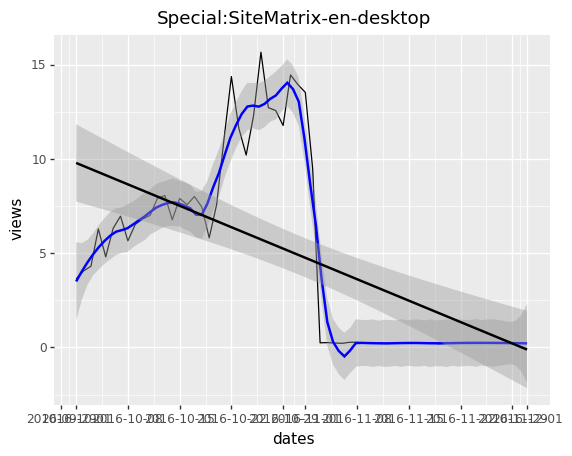

<ggplot: (-9223371846202300486)>

In [97]:
plot_rownr_zoom(10404, "2016-10-01", "2016-12-01")

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


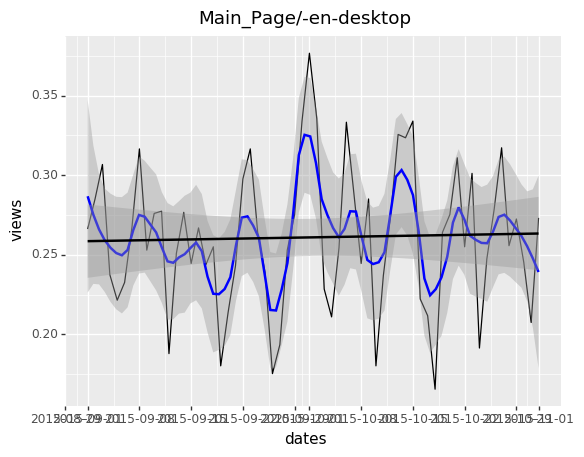

<ggplot: (-9223371846202192489)>

In [98]:
plot_rownr_zoom(9775, "2015-09-01", "2015-11-01")

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


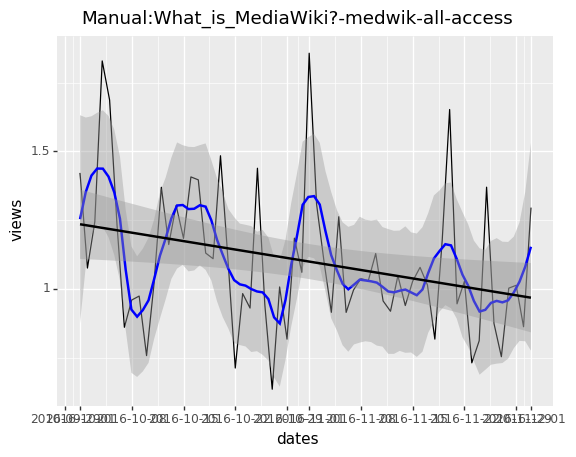

<ggplot: (190652110172)>

In [99]:
plot_rownr_zoom(139120, "2016-10-01", "2016-12-01")

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


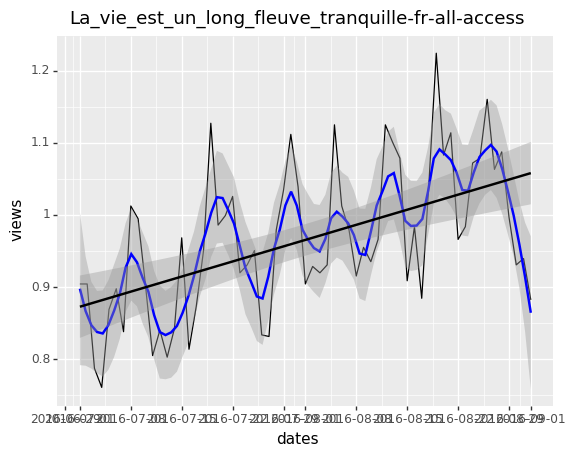

<ggplot: (-9223371846158471392)>

In [100]:
plot_rownr_zoom(110658, "2016-07-01", "2016-09-01")

We see that the high-view-count time series on the left hand side show a very regular periodicity that is strikingly similar for both of them. A similar structure can be seen on the right hand side, although here it is partly distorted by a slight upward trend (upper right) and/or variance caused by lower viewing numbers (lower right).

These plots provide evidence that there is variability on a weekly scale. The next figure will visualise this weekly behaviour in a different way:

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

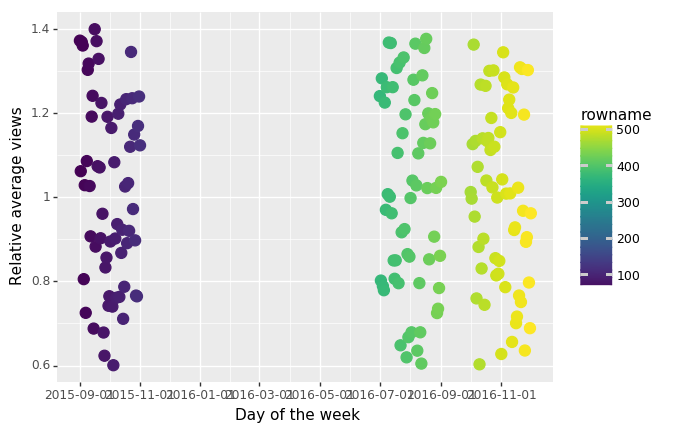

<ggplot: (-9223371846158471364)>

In [101]:
rownr=10404

start = "2016-10-01"

end = "2016-12-01"
dateView1=extract_ts_nrm(rownr)
dateView1["dates"] = pd.to_datetime(dateView1['dates'])
startDate=datetime.strptime(start , '%Y-%m-%d')
endDate=datetime.strptime(end , '%Y-%m-%d')
dateView1=dateView1[(dateView1["dates"]>=startDate) & (dateView1["dates"]<=endDate)]
dateView1["wday_views"]=dateView1["views"].mean()
dateView1["wday_views"]=dateView1["wday_views"]/np.mean(dateView1["wday_views"])
dateView1["rowname"]= dateView1.index
rownr=9775

start ="2015-09-01"

end = "2015-11-01"
dateView2=extract_ts_nrm(rownr)
dateView2["dates"] = pd.to_datetime(dateView2['dates'])
startDate=datetime.strptime(start , '%Y-%m-%d')
endDate=datetime.strptime(end , '%Y-%m-%d')
dateView2=dateView2[(dateView2["dates"]>=startDate) & (dateView2["dates"]<=endDate)]
dateView2["wday_views"]=dateView2["views"].mean()
dateView2["wday_views"]=dateView2["wday_views"]/np.mean(dateView2["wday_views"])
dateView2["rowname"]= dateView2.index

rownr=110658

start ="2016-07-01"

end = "2016-09-01"
dateView3=extract_ts_nrm(rownr)
dateView3["dates"] = pd.to_datetime(dateView3['dates'])
startDate=datetime.strptime(start , '%Y-%m-%d')
endDate=datetime.strptime(end , '%Y-%m-%d')
dateView3=dateView3[(dateView3["dates"]>=startDate) & (dateView3["dates"]<=endDate)]
dateView3["wday_views"]=dateView3["views"].mean()
dateView3["wday_views"]=dateView3["wday_views"]/np.mean(dateView3["wday_views"])
dateView3["rowname"]= dateView3.index


m=pd.concat([dateView1,dateView2,dateView3])
ggplot(m,aes("dates", "wday_views",color = "rowname")) +geom_jitter(size = 4, width = 0.1) +labs(x = "Day of the week", y = "Relative average views")

In this plot, a period of 7 days is indicated by the vertical blue line.

As expected, we find that all four data sets share a strong signal at a period of 1 week. This is particularly evident in the clean time series’ with high median views, but also still in the article with lower views. <b><font color="#404040">In our following analysis we can therefore reasonably assume that a period of 7 days is present in all our articles.</font></b>

## 6 Forecast methods for selected examples
Now that we have identified a sample of time series’ with extreme parameters we can use them to test different forecasting methods. For a sample of 145k articles we will most likely have to rely on an automatic mechanism to make our predictions (although a degree of fine-tuning might be possible). Therefore, our forecasting method will have to perform robustly for a range of different time series shapes and varibilities. Those methods that manage to deal with our extreme examples should be able to deal with any less variable time series as well.

For this competition our forecast period is 2 monts, i.e. about 60 days. In the following, we simulate this period and assess our prediction accuracy by keeping a hold-out sample of the last 60 days from our forecasting data. After making the prediction we can compare the actual view counts to the forecasted ones.

## 6.1 ARIMA / auto.arima
A popular approach in time series forecasting is to use an autoregressive integrated moving average model; short [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) model. This kind of model consists of three parts, parametrised by indeces p, d, q as ARIMA(p, d, q):

- auto-regressive / p: we are using past data to compute a regression model for future data. The parameter p indicates the range of lags; e.g. ARIMA(3,0,0) includes t-1, t-2, and t-3 values in the regression to compute the value at t.

- integrated / d: this is a differencing parameter, which gives us the number of times we are subtracting the current and the previous values of a time series. Differencing removes the change in a time series in that it stabilises the mean and removes (seasonal) trends. This is necessary since computing the lags (e.g. difference between time t and time t-1) is most meaningful if large-scale trends are removed. A time series where the variance (or amount of variability) (and the autocovariance) are time-invariant (i.e. don’t change from day to day) is called stationary.

- moving average / q: this parameter gives us the number of previous error terms to include in the regression error of the model.

Using our insight about the weekly periodicity, we can directly incorporate this frequency when turning our view counts into a time series object (using the ts function). Note, that we also perform some cleaning and outlier rejection using the tsclean tool. As usual, we wrap the modelling and plotting process into a function and then apply it to four time series sets that we know from our previous analysis:



In [103]:
pre_views_arima= pd.DataFrame(columns={'dates','views'})
post_views_arima= pd.DataFrame(columns={'dates','views'})
def plot_auto_arima_rownr(rownr):
    pageviews_arima= extract_ts(rownr)
    pred_len=60
    pred_range=[(pageviews_arima.shape[0]-pred_len+1),pageviews_arima.shape[0]]
    pre_views_arima=pageviews_arima.head(pageviews_arima.shape[0]-pred_len)
    post_views_arima= pageviews_arima.tail(pred_len)
    stepwise_fit = auto_arima(pre_views_arima["views"], start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True)  # set to stepwise
    
    fc_views =stepwise_fit.predict(n_periods=pred_len)
    plt.plot(pre_views_arima["views"])
    plt.plot(fc_views,c="red")

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4378.101, BIC=4398.938, Fit time=4.686 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4886.870, BIC=4895.205, Fit time=0.125 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4649.461, BIC=4666.131, Fit time=1.546 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4399.901, BIC=4416.571, Fit time=1.489 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4380.169, BIC=4405.174, Fit time=3.078 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=4674.412, BIC=4691.082, Fit time=1.653 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=4379.038, BIC=4404.043, Fit time=14.612 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4380.270, BIC=4409.443, Fit time=15.141 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4376.369, BIC=4401.375, Fit time=5.177 seconds
Fit ARIMA: order=(2, 1, 0)

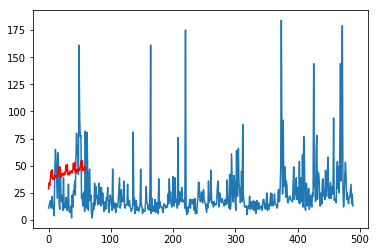

In [104]:
plot_auto_arima_rownr(1)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=7679.407, BIC=7687.742, Fit time=0.078 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=7534.601, BIC=7551.272, Fit time=1.500 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=7287.148, BIC=7303.818, Fit time=3.814 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=7277.707, BIC=7298.545, Fit time=3.952 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=7523.374, BIC=7540.044, Fit time=2.140 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=7291.141, BIC=7316.146, Fit time=11.486 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=7639.158, BIC=7651.661, Fit time=0.685 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=7283.071, BIC=7312.244, Fit time=16.384 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_or

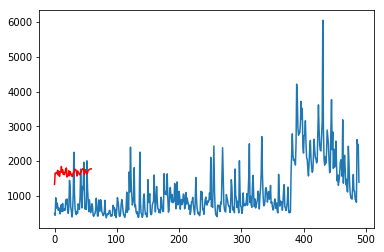

In [108]:
plot_auto_arima_rownr(95856)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=7765.392, BIC=7786.230, Fit time=4.786 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=8153.392, BIC=8161.727, Fit time=0.109 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=7996.397, BIC=8013.068, Fit time=1.407 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=7786.285, BIC=7802.955, Fit time=2.166 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=7766.787, BIC=7791.792, Fit time=5.540 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=8053.552, BIC=8070.222, Fit time=0.970 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=7732.569, BIC=7757.574, Fit time=6.054 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

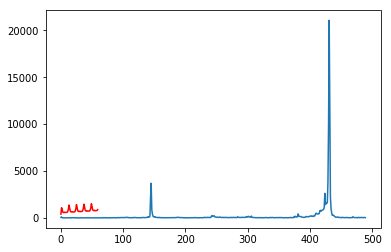

In [109]:
plot_auto_arima_rownr(108341)

The results are not too bad, actually. Especially the lower left plot. We even got a downturn in the upper left plot. The upper right plot is a challenging problem, because the levelling of the viewer numbers at the end of the time range was not predictable from the previous behaviour. The same is true for the large spike in the lower right plot.

<b><font color="#404040">Given that it’s a fully automatic forecast (assuming only weekly periodicities) the auto.arima tool performs decently and provides us with a useful baseline to compare other methods to.</font></b>

## 6.2 Prophet - Section currently under maintenance
Prophet is an open-source time series forecasting tool developed by Facebook. It is implemented in an R library, and also a Python package (as already shown in this competition).

Prophet works as an additive regression model which decomposes a time series into (i) a (piecewise) linear/logistic trend, (ii) a yearly seasonal component, (iii) a weekly seasonal component, and (iv) an optional list of important days (such as holidays, special events, …). It claims to be “robust to missing data, shifts in the trend, and large outliers”, which would make it well suited for this particular task

## 6.2.1 Basic performance
First, let’s test the tool:

In [110]:
dateView= pd.DataFrame(columns={'dates','views'})
rownr=139120
pageviews= extract_ts(rownr)
pageviews["dates"] = pd.to_datetime(pageviews['dates'])
pageviews.rename(columns={'dates':'ds',
                          'views':'y'}, inplace=True)
pred_len=60
pred_range=[(pageviews.shape[0]-pred_len+1),pageviews.shape[0]]
pre_views=pageviews.head(pageviews.shape[0]-pred_len)
post_views= pageviews.tail(pred_len)

In [111]:
from fbprophet import Prophet

A few notes about the practical workings of prophet:

- data format: prophet expects a data frame with two columns: ds, y. The first one holds the dates, the second one the time series counts.

- parameter changepoint.prior.scale adjusts the trend flexibility. Increasing this parameter makes the fit more flexible, but also increases the forecast uncertainties and makes it more likely to overfit to noise. The changepoints in the data are automatically detected unless being specified by hand using the changepoints argument (which we don’t do here).

- parameter yearly.seasonality=TRUE has to be enabled explicitely and allows prophet to notice large-scale cycles. The importance of this parameter is explored further below.

This is the standard prophet forecast plot:

In [112]:
m = Prophet()
m.fit(pageviews)
future = m.make_future_dataframe(periods=pred_len)
future.tail()
forecast = m.predict(future)


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


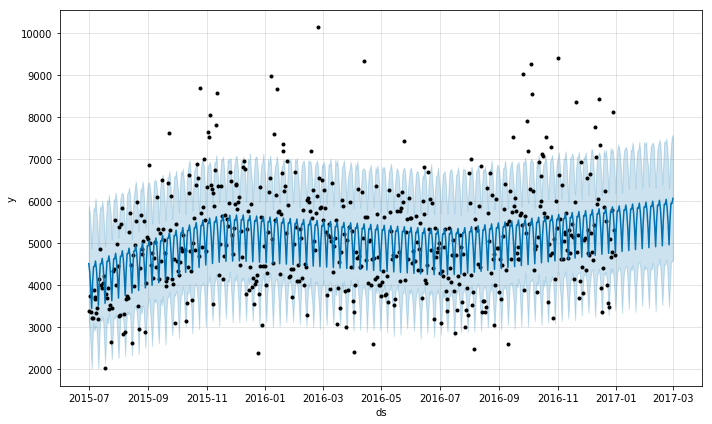

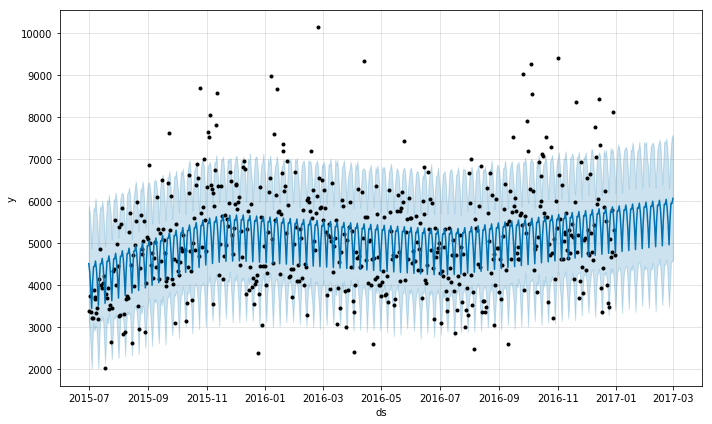

In [113]:
m.plot(forecast)

The observed data are plotted as black points and the fitted model, plus forecast, as a blue line. In light blue we see the corresponding uncertainties.

Prophet offers a decomposition plot, where we can inspect the additive components of the model: trend, yearly seasonality, and weekly cycles:

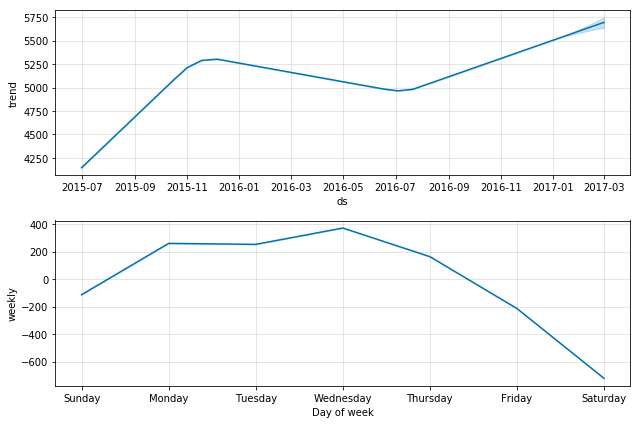

In [114]:
fig2 = m.plot_components(forecast)


We see that prophet recovers the weekly variation pattern we had extracted by hand in the previous section. This is a useful consistency check. The seasonal variability suggests an overall decline in views towards the middle of the year.

Being the ggplot2 freaks that we are, we decide to visualise our forecast in a different way that gives us more control over the output:



C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


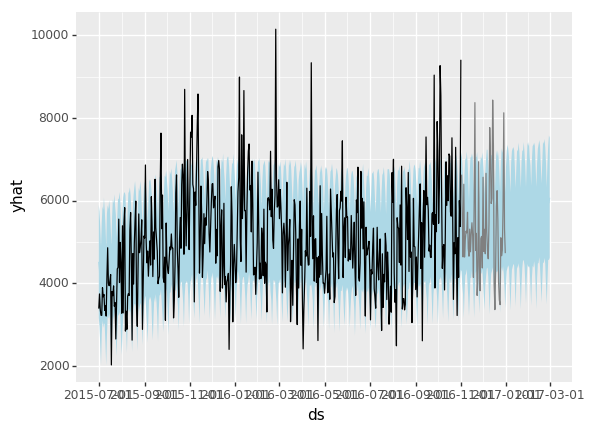

<ggplot: (190652677468)>

In [115]:
 ggplot(forecast,aes("ds", "yhat")) + geom_ribbon(aes(x = "ds", ymin = "yhat_lower", ymax = "yhat_upper"), fill = "lightblue") + geom_line(colour = "#ADD8E6") +geom_line(pre_views, aes("ds", "y"), colour = "black") +geom_line(post_views, aes("ds", "y"), colour = "grey")

Here we plot the observed data as black line, our hold-out set as a grey line, and the forecast plus uncertainties in blue and light blue, again. This shows us immediately how our model is performing, and in this case it’s not doing badly.

We turn this ggplot2 version into a plotting function and use it to predict a couple of sample time series. We also include the seasonality parameter (TRUE/FALSE) as a second input:



In [116]:
def plot_prophet_rownr_season(rownr, season):
    art=tpages['article'][rownr]
    loc=tpages['locale'][rownr]
    acc=tpages['access'][rownr]
    pageviews= extract_ts(rownr)
    pageviews["dates"] = pd.to_datetime(pageviews['dates'])
    pageviews.rename(columns={'dates':'DS',
                          'views':'Y'}, inplace=True)
    pred_len=60
    pred_range=[(pageviews.shape[0]-pred_len+1),pageviews.shape[0]]
    pre_views=pageviews.head(pageviews.shape[0]-pred_len)
    post_views= pageviews.tail(pred_len)
    m = Prophet(changepoint_prior_scale=0.5, yearly_seasonality=season)
    m.fit(pageviews)
    future = m.make_future_dataframe(periods=pred_len)
    future.tail()
    forecast = m.predict(future)
    return  ggplot(forecast,aes("ds", "yhat")) + geom_ribbon(aes(x = "ds", ymin = "yhat_lower", ymax = "yhat_upper"), fill = "lightblue") + geom_line(colour = "#ADD8E6") +geom_line(pre_views, aes("ds", "y"), colour = "black") +geom_line(post_views, aes("ds", "y"), colour = "grey")

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


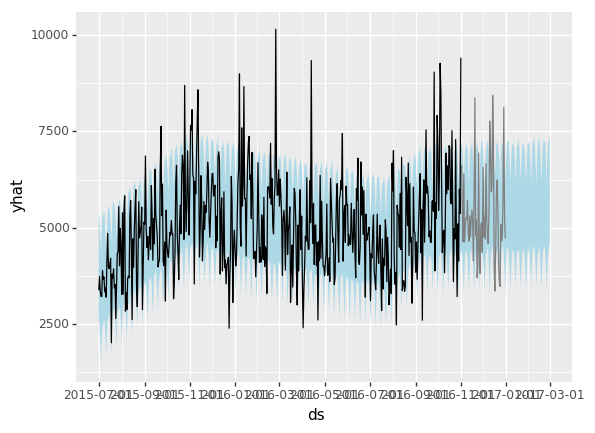

<ggplot: (-9223371846202401911)>

In [117]:
plot_prophet_rownr_season(70772, False)

 Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


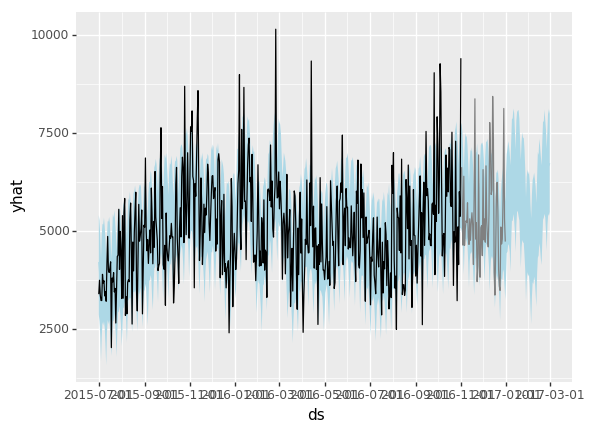

<ggplot: (-9223371846202024658)>

In [118]:
plot_prophet_rownr_season(108341, True)

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


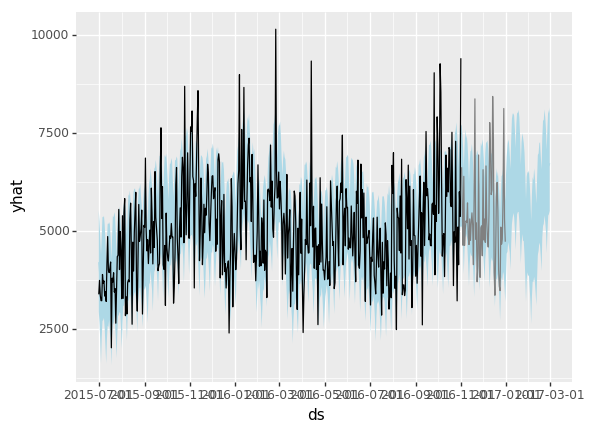

<ggplot: (190652890302)>

In [119]:
plot_prophet_rownr_season(95856, True)

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


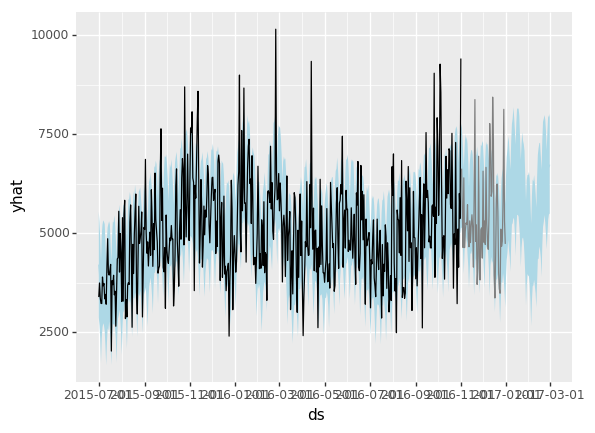

<ggplot: (190652536717)>

In [120]:
plot_prophet_rownr_season(139120, True)

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.

## 6.2.2 The importance of seasonal variations
Enabling prophet to recognise long-term seasonal variations in the data is crucial for a successful forecasting of our time series data. To demonstrate this, below I’m plotting the following two sample curves: the German main page and the entry for Oxygen in the Spanish wikipedia (many thanks to MuonNeutrino for flagging this time series in their great exploratory kernel):



INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


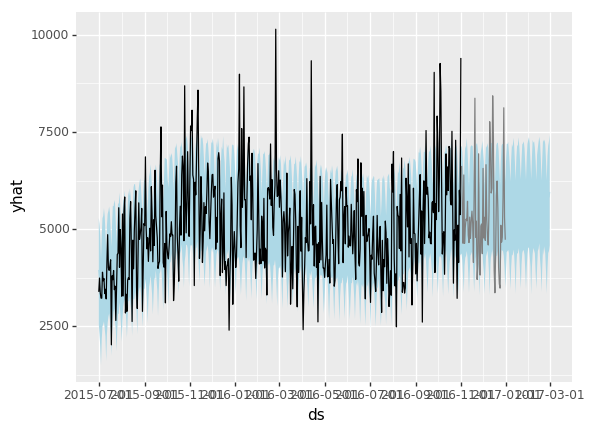

<ggplot: (-9223371846202655523)>

In [121]:
plot_prophet_rownr_season(72480, False)

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.

Initial log joint probability = -12.7547
Optimization terminated normally: 
Convergence detected: absolute parameter change was below tolerance

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


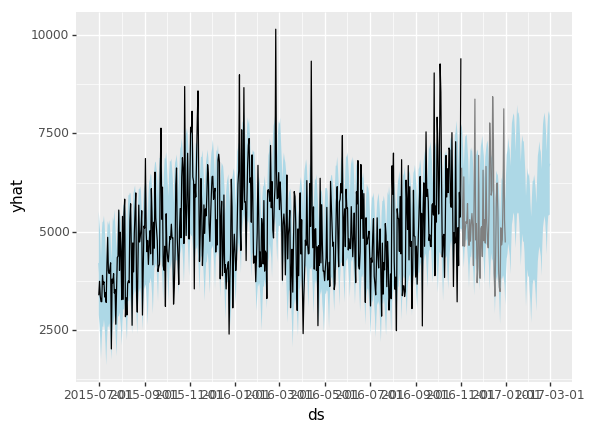

<ggplot: (190652683398)>

In [122]:
plot_prophet_rownr_season(72480, True)

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.

Initial log joint probability = -12.7547
Optimization terminated normally: 
Convergence detected: relative gradient magnitude is below tolerance

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


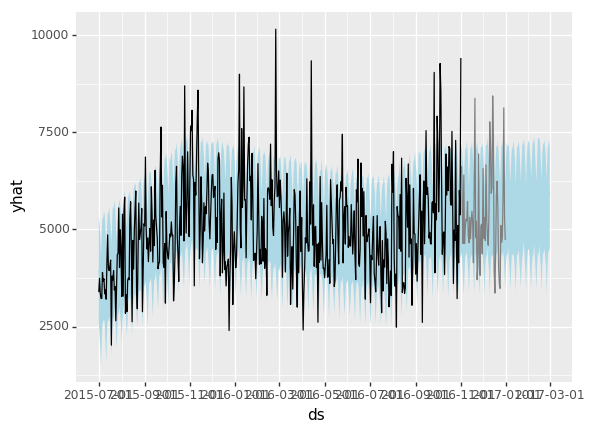

<ggplot: (190652110733)>

In [123]:
plot_prophet_rownr_season(139120, False)

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.
Initial log joint probability = -2.84109
Optimization terminated normally: 
Convergence detected: relative gradient magnitude is below tolerance

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


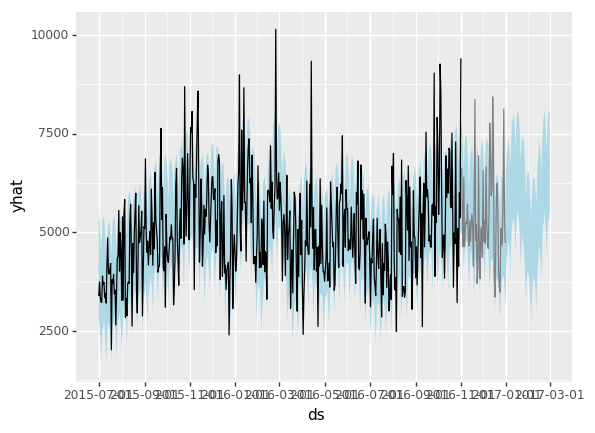

<ggplot: (-9223371846202233340)>

In [124]:
plot_prophet_rownr_season(139120, True)

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.
Initial log joint probability = -2.84109
Optimization terminated normally: 
Convergence detected: relative gradient magnitude is below tolerance

The upper row of plot shows forecasts without a seasonal component vs the presence of this component in the lower row. We can clearly see that the seasonal forecasts predict the real time series evolution much better than the others. <b><font color="#404040">A seasonal component should be included in a successful prophet model for this project.</font></b>

Thanks for reading this exploration! I’m grateful for all the upvotes and the great feedback.

Have fun!